In [1]:
import pandas as pd
import csv
import toolbox as tbx

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import missingno as msno
from urllib import request
import datetime as dt
import re


from wordcloud import WordCloud

<h1  style= "background-color: gray;
                 color:white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Préparation des données </h1>

## 1. Introduction

In [ ]:
#data = pd.read_csv("/Users/alhassanneahmedap59_cb/oc/project_3/data/fr.openfoodfacts.org.products.csv", sep='\t', low_memory=False)

In [2]:
data_en = pd.read_csv("/Users/alhassanneahmedap59_cb/oc/project_3/data/en.openfoodfacts.org.products.csv", sep='\t', low_memory=False)

Analyse exploratoire et descriptive des données issus du dataset OpenFoodFacts avec pour objectif de développer une application de nutrition.

Dans cette première partie, nous allons déterminer l'idée de l'application puis selectionner les données pertinentes.

**Plan d'action**
1. Analyser le dataset
2. Explorer les donnés 
3. Déterminer et peaufiner l'idée de l'application en fonction des données
4. Sélectionner les données pertinentes pour l'idée


https://static.openfoodfacts.org/data/data-fields.txt

## 2. Analyse du dataset

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,Andrè,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,Skyr,NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*********************************** Data infos ***********************************
Nombre de colonnes :  186 

Nombre de lignes :  2561947 


 ********************************** Valeurs manquantes **********************************


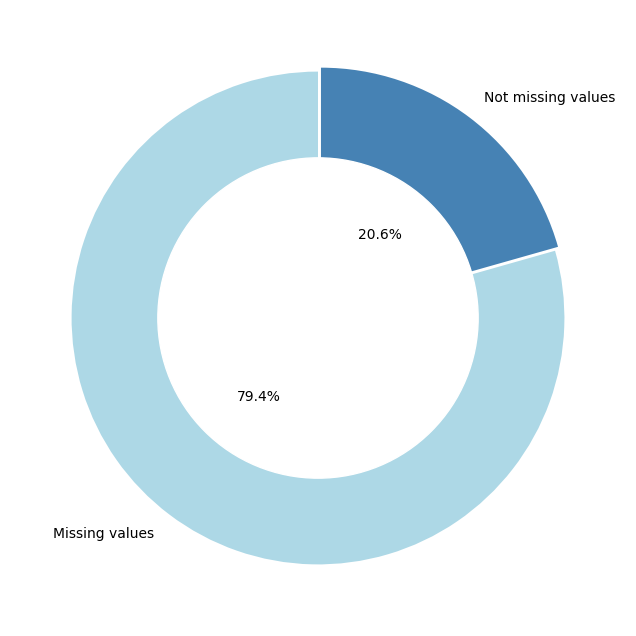

Nombre total de valeurs manquantes :  378356794 



In [4]:
display(data_en.head())
tbx.describe_data(data_en)

In [5]:
#msno.bar(data_en, color='dodgerblue')
#plt.show()

In [7]:
full_nan = tbx.null_factor(data_en, 100)

display(full_nan.head())
print('Nombre de colonnes 100% nulles :', (len(full_nan)))

,variable,nan_rate
0,-melissic-acid_100g,100.0
1,-linoleic-acid_100g,100.0
2,-eicosapentaenoic-acid_100g,100.0
3,-alpha-linolenic-acid_100g,100.0
4,-montanic-acid_100g,100.0


Nombre de colonnes 100% nulles : 37


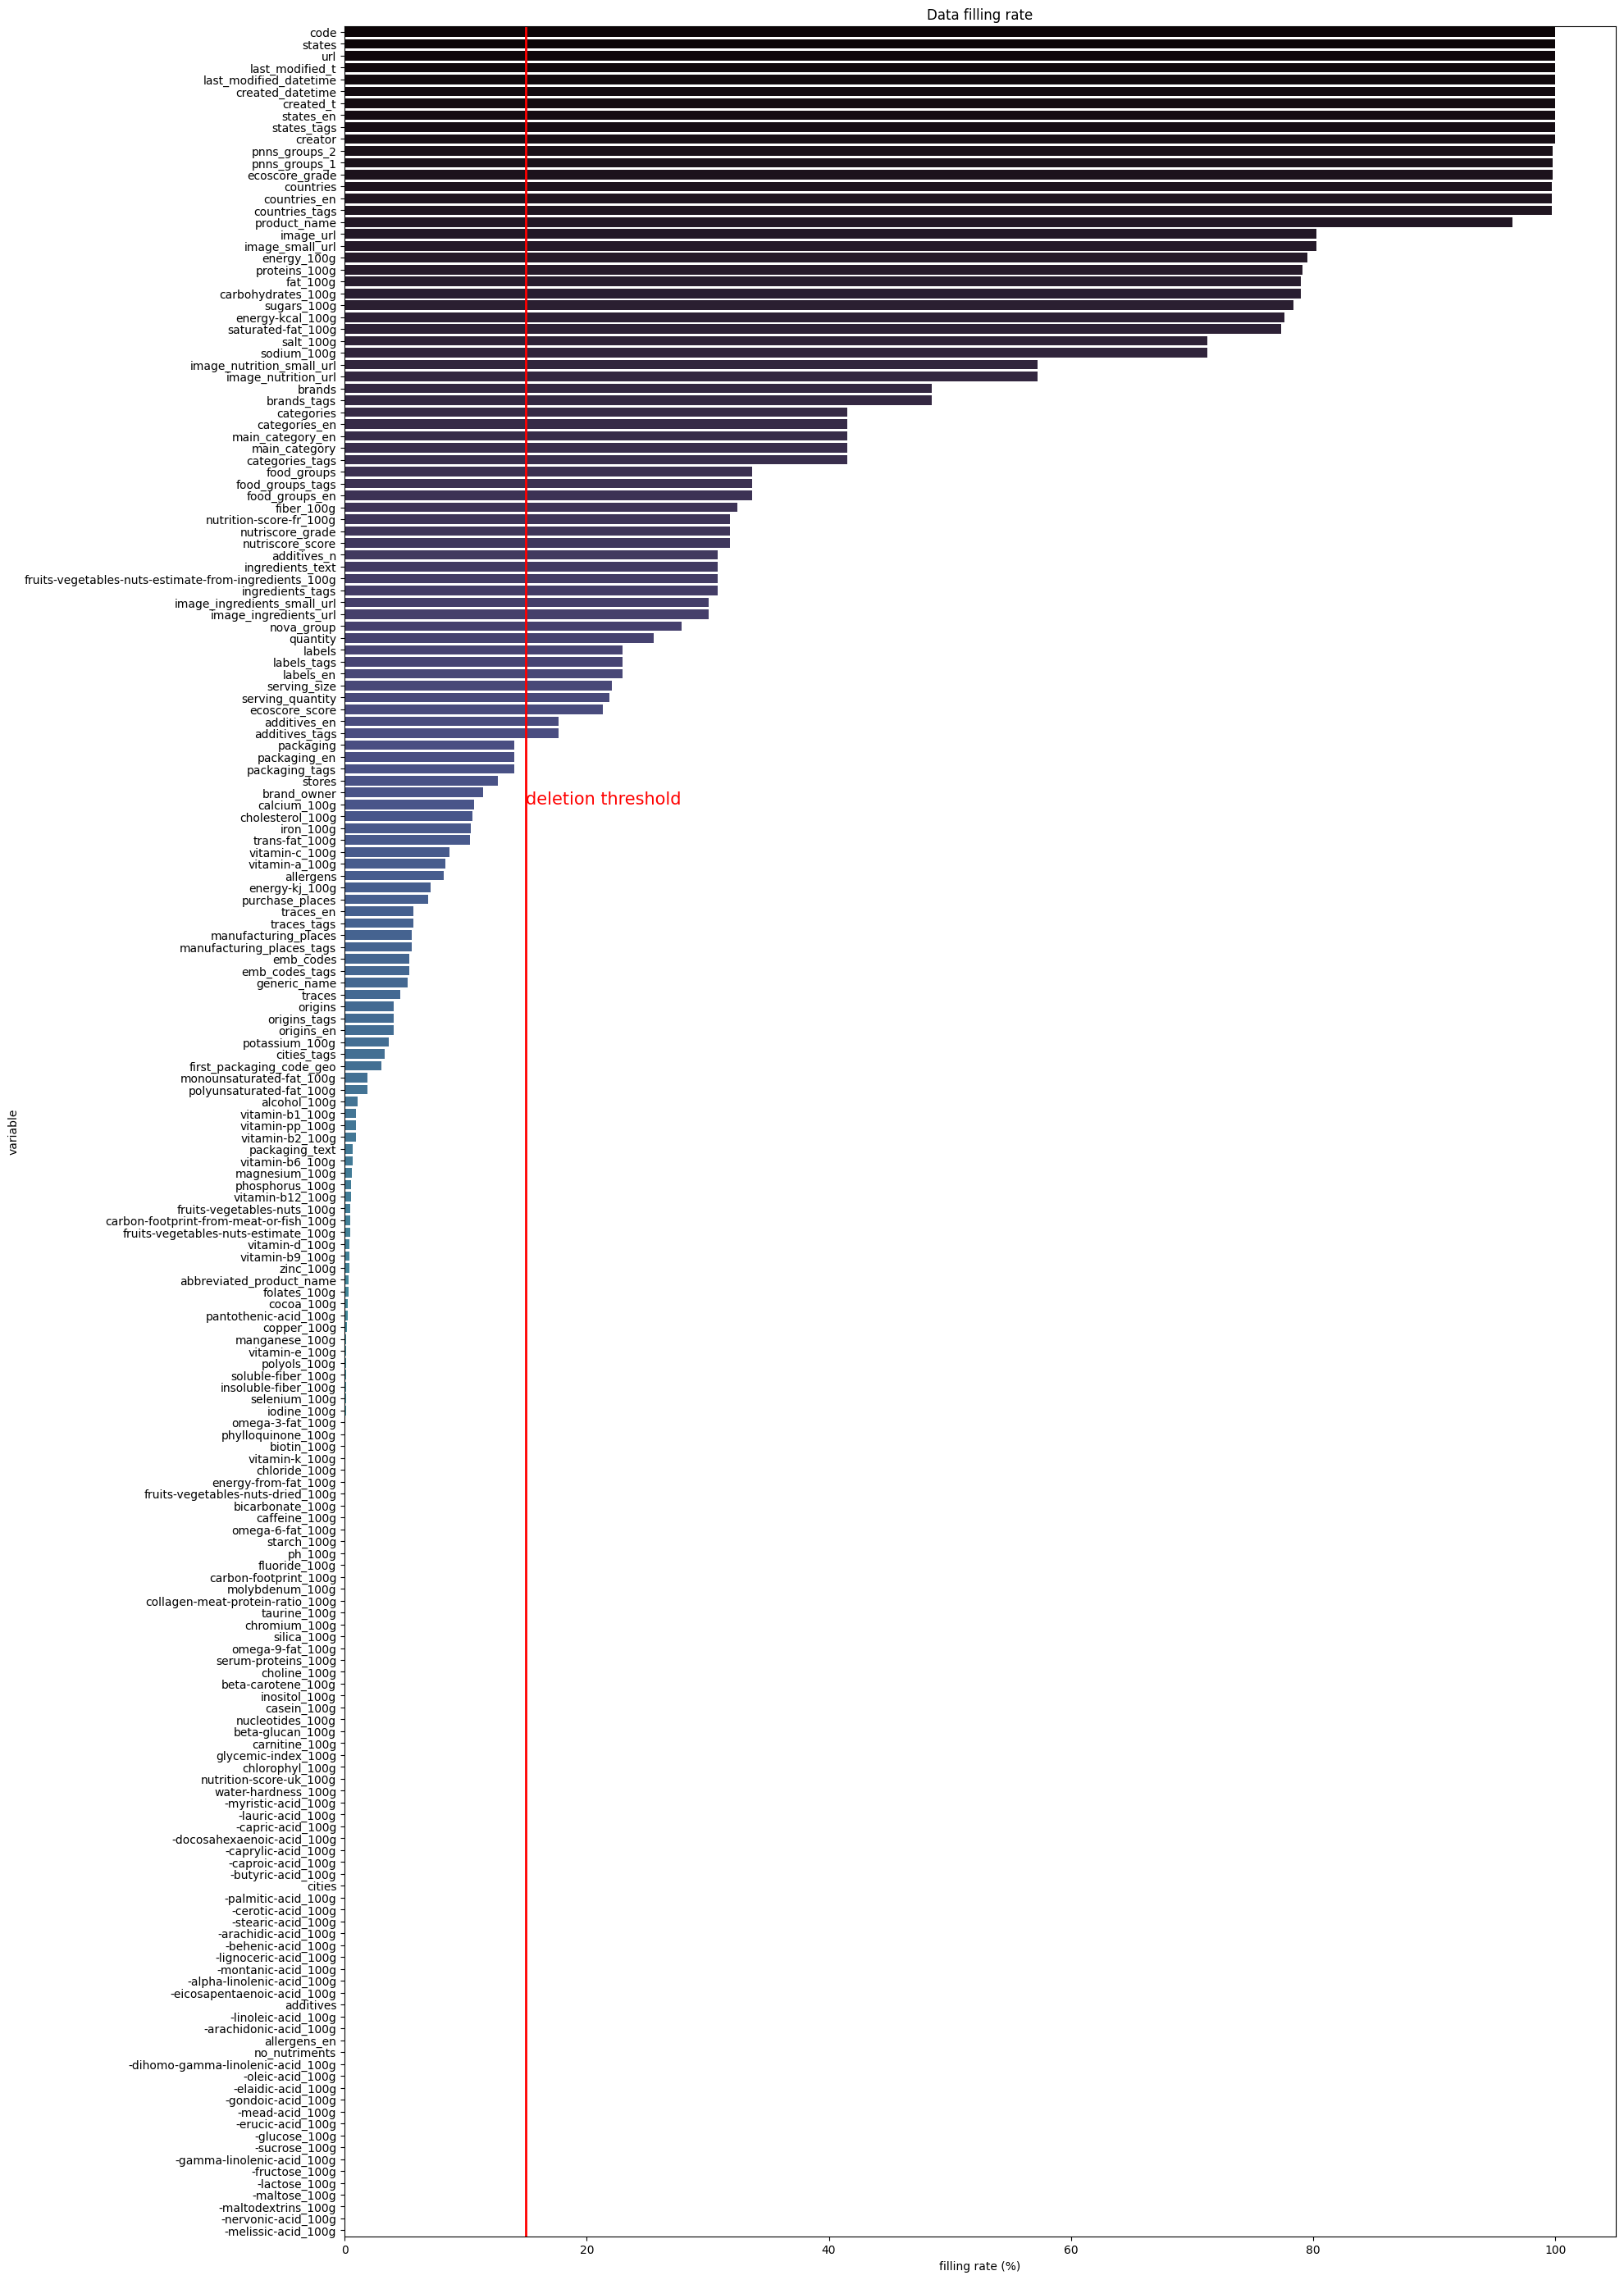

In [8]:
tbx.filling_rate_viz(data_en, del_threshold=15)

In [9]:
filling_features = tbx.null_factor(data_en, 0)
filling_features.tail(50)

,variable,nan_rate
136,image_ingredients_url,69.915303
137,image_ingredients_small_url,69.915303
138,ingredients_tags,69.210878
139,fruits-vegetables-nuts-estimate-from-ingredien...,69.186755
140,ingredients_text,69.146747
141,additives_n,69.146629
142,nutriscore_score,68.170497
143,nutriscore_grade,68.170497
144,nutrition-score-fr_100g,68.170380
145,fiber_100g,67.559750


In [10]:
filling_features = tbx.null_factor(data_en, 0)
#filling_features.loc[filling_features['nan_rate']>15, 'variable'].values.tolist().append('fruits-vegetables-nuts_100g')

In [11]:
# features to keep
to_keep = filling_features[filling_features['nan_rate']<85]['variable'].tolist()
to_keep.append('fruits-vegetables-nuts_100g')

# features to delete
#to_deleted = filling_features[~filling_features['nan_rate']>15]['variable'].tolist()

# new dataset without columns with nanrate greater than 15%
data = data_en[to_keep]
data.head(3)

,additives_tags,additives_en,ecoscore_score,serving_quantity,serving_size,labels_en,labels_tags,labels,quantity,nova_group,...,states,states_tags,states_en,created_t,created_datetime,last_modified_datetime,last_modified_t,url,code,fruits-vegetables-nuts_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",1623855208,2021-06-16T14:53:28Z,2021-06-16T14:53:29Z,1623855209,http://world-en.openfoodfacts.org/product/0000...,00000000000000225,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1656948610,2022-07-04T15:30:10Z,2022-07-04T15:30:13Z,1656948613,http://world-en.openfoodfacts.org/product/0000...,0000000000000207025004,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1630483911,2021-09-01T08:11:51Z,2022-06-29T07:35:06Z,1656488106,http://world-en.openfoodfacts.org/product/0000...,00000000000003429145,NaN


In [12]:
# redundant columns example
data[['food_groups','food_groups_tags','food_groups_en']].head()

,food_groups,food_groups_tags,food_groups_en
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,en:dairy-desserts,"en:milk-and-dairy-products,en:dairy-desserts","Milk and dairy products,Dairy desserts"
4,NaN,NaN,NaN


In [14]:

redundant_columns = tbx.redundant_col(data)

additives           |  no suffixe  : False    |   suffixe _en : True    |  suffixe _tags : True
labels              |  no suffixe  : True    |   suffixe _en : True    |  suffixe _tags : True
food_groups         |  no suffixe  : True    |   suffixe _en : True    |  suffixe _tags : True
main_category       |  no suffixe  : True    |   suffixe _en : True    |  suffixe _tags : False
categories          |  no suffixe  : True    |   suffixe _en : True    |  suffixe _tags : True
countries           |  no suffixe  : True    |   suffixe _en : True    |  suffixe _tags : True
states              |  no suffixe  : True    |   suffixe _en : True    |  suffixe _tags : True


In [15]:
redundant_columns

['additives_tags',
 'labels',
 'labels_tags',
 'food_groups',
 'food_groups_tags',
 'main_category',
 'main_category_tags',
 'categories',
 'categories_tags',
 'countries',
 'countries_tags',
 'states',
 'states_tags']

In [16]:
# keep all additives insights for now
redundant_columns.remove('additives_tags')

In [17]:
# drop redundant columns
print('The redundant columns below will be deleted :')
print(*redundant_columns, sep='\n')
data = data.loc[:, ~data.columns.isin(redundant_columns)]
print()
# drop dates columns not useful
print('The date columns (not useful) below will be deleted :')
print(*['created_t','last_modified_t'], sep='\n')
data = data.drop(['created_t','last_modified_t'], axis=1)

The redundant columns below will be deleted :
labels
labels_tags
food_groups
food_groups_tags
main_category
main_category_tags
categories
categories_tags
countries
countries_tags
states
states_tags

The date columns (not useful) below will be deleted :
created_t
last_modified_t


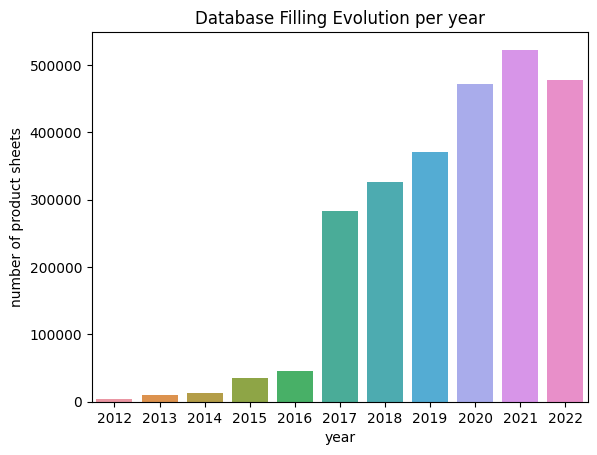

In [18]:
# plot evolution of database filling
db_evol = data[['created_datetime', 'code']].groupby(by=pd.to_datetime(data['created_datetime']).dt.year).nunique()
sns.barplot(data=db_evol, x=db_evol.index, y='code')
plt.title("Database Filling Evolution per year")
plt.xlabel("year")
plt.ylabel("number of product sheets")
plt.show()

In [19]:
countries = data.groupby(by="countries_en").nunique()
display(countries.head(10).index.tolist())
display(countries.tail(10).index.tolist())

['0',
 '12',
 '19,99',
 '3-4',
 '9ш',
 'Afghanistan',
 'Afghanistan,Belgium,France',
 'Afghanistan,France',
 'Afghanistan,France,French Guiana',
 'Afghanistan,France,Germany']

['فلسطين-\u200f',
 'كل-البلدان',
 'كور-\u200fستان',
 'ليبيا',
 'محمد-جمعه',
 'پاکستان',
 'ประเทศสิงคโปร์,ประเทศเยอรมนี,ประเทศไทย-thai,สหรัฐอเมริกา',
 '\u200e-\u200eegpt',
 '대한민국',
 '�']

In [20]:
df_countries = pd.read_csv("countries-en.csv",
                        sep=",", header=None, index_col = 0).rename(columns={0:"index", 1:"country_id", 2:"country_code_2", 3:"country_code_3", 4:"country_fr", 5:"country_en"})
df_countries.head()

,country_id,country_code_2,country_code_3,country_fr,country_en
0,,,,,
1,4,AF,AFG,Afghanistan,Afghanistan
2,8,AL,ALB,Albanie,Albania
3,10,AQ,ATA,Antarctique,Antarctica
4,12,DZ,DZA,Algérie,Algeria
5,16,AS,ASM,Samoa Américaines,American Samoa


In [21]:
countries_list_in_real = df_countries['country_en'].tolist()

In [22]:
false_countries =[]
for countries in data["countries_en"].str.split(','):
    if isinstance(countries, float):
        continue
    for country in countries :
        if country in countries_list_in_real:
            pass
        else:
            false_countries.append(country)

false_countries

['Russia',
 'Frankreich',
 'Spanien',
 'European Union',
 'Deutschland',
 'Spanien',
 'Russia',
 'Jersey',
 'Jersey',
 'Russia',
 'Guernsey',
 'Russia',
 'Iran',
 'Virgin Islands of the United States',
 'Palestinian territories',
 'Saint Pierre and Miquelon',
 'Irak',
 'En-us',
 'The Bahamas',
 'Moldova',
 'En-us',
 'Russia',
 'Vereinigte-staaten-von-amerika',
 'Sint Maarten',
 'Jersey',
 'France-united-states',
 'France-united-states',
 'Polynesie-francaise',
 'Estados-unidos',
 'Francia',
 'Deutschland',
 'Russia',
 'Allemagne',
 'Espagne',
 'The Bahamas',
 'Palestinian territories',
 'Francia',
 'Virgin Islands of the United States',
 'The Bahamas',
 'Palestinian territories',
 'Saint Martin',
 'Saint Martin',
 'Allemagne',
 'Royaume-uni',
 'Virgin Islands of the United States',
 'Virgin Islands of the United States',
 'Francia',
 'Republic-of-macedonia',
 'Iran',
 'En-en-united-kingdom',
 'Virgin Islands of the United States',
 'Saint Martin',
 'Allemagne',
 'Etats-unis',
 'Iran',


,additives_tags,occurrence
0,en:e330,146411
1,en:e322,99809
2,en:e322i,89522
3,en:e500,62119
4,en:e415,54324


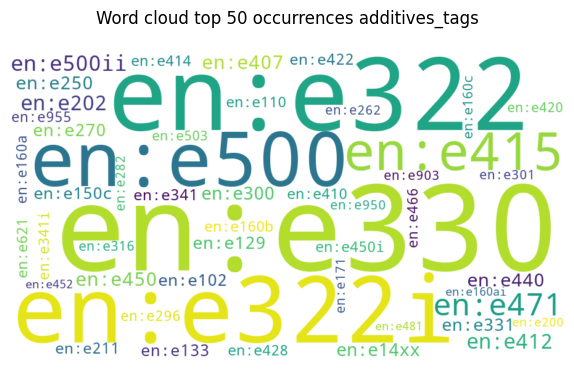

In [25]:
# Most represented additives
top_additives_df, top_additives_list = tbx.top_words(df=data, column="additives_tags")
display(top_additives_df.head())
tbx.plot_world_cloud(df=data,column="additives_tags", top=50, figsize=(9,4))

,countries_en,occurrence
0,France,929737
1,United States,531610
2,Spain,285606
3,Italy,188805
4,Germany,161604


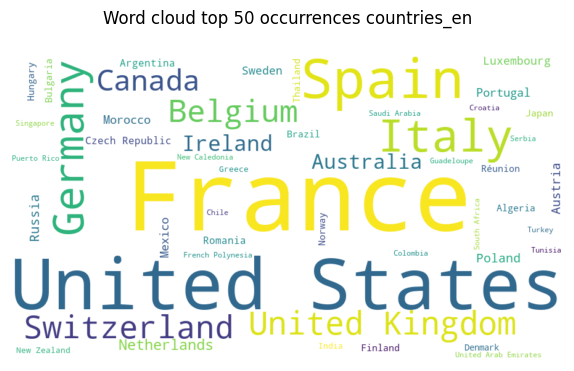

In [26]:
# Most represented countries
top_countries_df, top_countries_list = tbx.top_words(df=data, column="countries_en")
display(top_countries_df.head())
tbx.plot_world_cloud(df=data,column="countries_en", top=50, figsize=(9,4))

In [27]:
# Filter countries on France only
data = data[data["countries_en"].str.contains('|'.join(['France','French','United States']), regex=True)==True]

In [28]:
data[(data["product_name"].notnull()) 
      & (data["brands"].notnull())].groupby(by=["product_name","brands"])["code"].nunique().head(10)

product_name                                              brands                  
                                                          M&S                         1
 18 marrons glacés                                        Motta                       1
 6 Crêpes de sarrasin                                     Les délices de Landeleau    1
 Biscuit Tablette Chocolat au Lait bio                    U Bio,U                     1
 Boulettes à la Marocaine et légumes                      MARIE                       1
 Filet de merlu coulis de piquillos et tian d'aubergines  Très bien merci!            1
 Ginger drink                                             gold kili                   1
 Huile de Maïs Aromatisée Gingembre et Citronnelle        Vitasia,Lidl                1
 Jack Daniel's Tennessee Whiskey Gentleman Jack           Jack Daniel's               1
 Maxi Hot Dog New York Style                              Charal                      1
Name: code, dtype: int64

In [29]:
data[(data["product_name"].notnull()) 
      & (data["brands"].notnull())].groupby(by=["product_name","brands"])["code"].nunique().tail(10)

product_name                    brands          
울무차                             Da Jung Co.  Ltd    1
자연은 튼튼 (Jayeon-eun Teunteun)    자연은,Jayeon-eun      1
전복죽 Rice Porridge with Abalone  Bibigo              1
직화짜장                            청정원                 1
￼ Deodorant                     Old spice           1
𝒃𝒖𝒓𝒈𝒆𝒓 𝒔𝒂𝒖𝒄𝒆                    𝒏𝒆𝒘                 1
🍇 Raisins sultanines            Rapunzel            1
🍚Riz au lait🥛                   La Fermière         1
🐰 Lait du pays Alpin            Milka               1
📖                               leclaire            1
Name: code, dtype: int64

In [30]:
# delete duplicated rows based on code
data.drop_duplicates(subset ="code", keep = 'last', inplace=True)

/var/folders/6q/l5f8yh2s7zb3h6v917nhx4gr0000gp/T/ipykernel_6277/1992993180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset ="code", keep = 'last', inplace=True)


In [31]:
# delete duplicated rows based on product name and brands at the same time
data = data[(~data.duplicated(["product_name","brands"],keep="last")) 
      | ((data['product_name'].isnull()) & (data['brands'].isnull()))]

In [33]:
categs = ['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]

pnns_groups_1 = tbx.split_words(df = data, column = 'pnns_groups_1')
pnns_groups_2 = tbx.split_words(df = data, column = 'pnns_groups_2')
display(pnns_groups_1)
display(pnns_groups_2)

{'Alcoholic beverages',
 'Beverages',
 'Cereals and potatoes',
 'Composite foods',
 'Fat and sauces',
 'Fish Meat Eggs',
 'Fruits and vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'Sugary snacks',
 'sugary-snacks',
 'unknown'}

{'Alcoholic beverages',
 'Appetizers',
 'Artificially sweetened beverages',
 'Biscuits and cakes',
 'Bread',
 'Breakfast cereals',
 'Cereals',
 'Cheese',
 'Chocolate products',
 'Dairy desserts',
 'Dressings and sauces',
 'Dried fruits',
 'Eggs',
 'Fats',
 'Fish and seafood',
 'Fruit juices',
 'Fruit nectars',
 'Fruits',
 'Ice cream',
 'Legumes',
 'Meat',
 'Milk and yogurt',
 'Nuts',
 'Offals',
 'One-dish meals',
 'Pastries',
 'Pizza pies and quiche',
 'Pizza pies and quiches',
 'Plant-based milk substitutes',
 'Potatoes',
 'Processed meat',
 'Salty and fatty products',
 'Sandwiches',
 'Soups',
 'Sweetened beverages',
 'Sweets',
 'Teas and herbal teas and coffees',
 'Unsweetened beverages',
 'Vegetables',
 'Waters and flavored waters',
 'pastries',
 'unknown'}

In [34]:
data["pnns_groups_1"] = data["pnns_groups_1"].str.replace('sugary-snacks', 'Sugary snacks')
for x in ['Pizza pies and quiche','Pizza pies and quichesssss','Pizza pies and quichessssss','Pizza pies and quichesss','Pizza pies and quichess']:
    data["pnns_groups_2"] = data["pnns_groups_2"].str.replace(x,'Pizza pies and quiches')
display(data["pnns_groups_1"].unique().tolist())
display(data["pnns_groups_2"].unique().tolist())

/var/folders/6q/l5f8yh2s7zb3h6v917nhx4gr0000gp/T/ipykernel_6277/4146624051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pnns_groups_1"] = data["pnns_groups_1"].str.replace('sugary-snacks', 'Sugary snacks')
/var/folders/6q/l5f8yh2s7zb3h6v917nhx4gr0000gp/T/ipykernel_6277/4146624051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pnns_groups_2"] = data["pnns_groups_2"].str.replace(x,'Pizza pies and quiches')


['unknown',
 'Fat and sauces',
 'Sugary snacks',
 'Fruits and vegetables',
 'Composite foods',
 'Beverages',
 'Fish Meat Eggs',
 'Cereals and potatoes',
 'Milk and dairy products',
 nan,
 'Salty snacks',
 'Alcoholic beverages']

['unknown',
 'Dressings and sauces',
 'Biscuits and cakes',
 'Fruits',
 'One-dish meals',
 'Sweetened beverages',
 'Meat',
 'Bread',
 'Cheese',
 'Fish and seafood',
 nan,
 'Salty and fatty products',
 'Fruit juices',
 'Dried fruits',
 'Sweets',
 'Vegetables',
 'Fats',
 'Dairy desserts',
 'Pizza pies and quiches',
 'Legumes',
 'Unsweetened beverages',
 'Cereals',
 'Alcoholic beverages',
 'Pastries',
 'Nuts',
 'Appetizers',
 'Milk and yogurt',
 'Processed meat',
 'Breakfast cereals',
 'Chocolate products',
 'Sandwiches',
 'Ice cream',
 'Soups',
 'Teas and herbal teas and coffees',
 'Artificially sweetened beverages',
 'Eggs',
 'Waters and flavored waters',
 'Plant-based milk substitutes',
 'Offals',
 'Potatoes',
 'Fruit nectars',
 'pastries']

************************* categories_en *************************
Total of unique values in categories_en : 24749


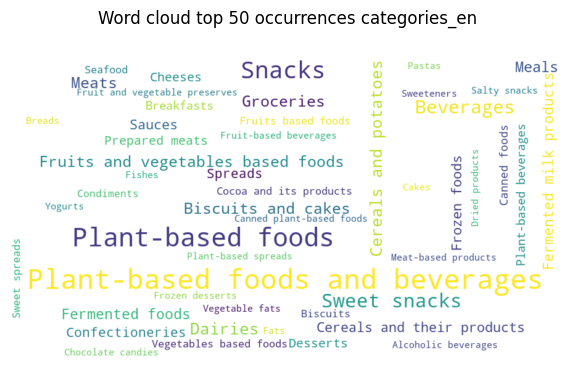

************************* pnns_groups_1 *************************
Total of unique values in pnns_groups_1 : 11


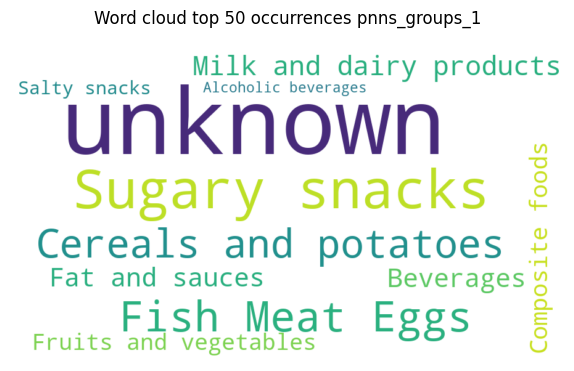

************************* pnns_groups_2 *************************
Total of unique values in pnns_groups_2 : 41


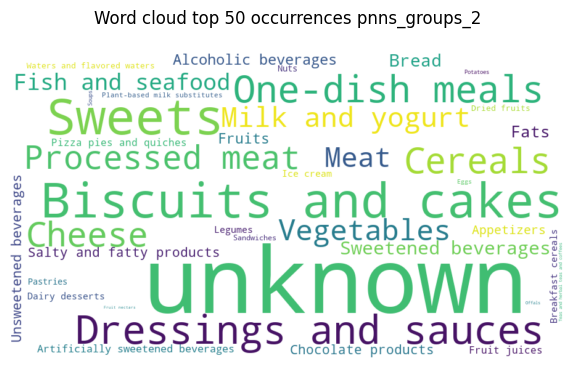

************************* main_category_en *************************
Total of unique values in main_category_en : 21475


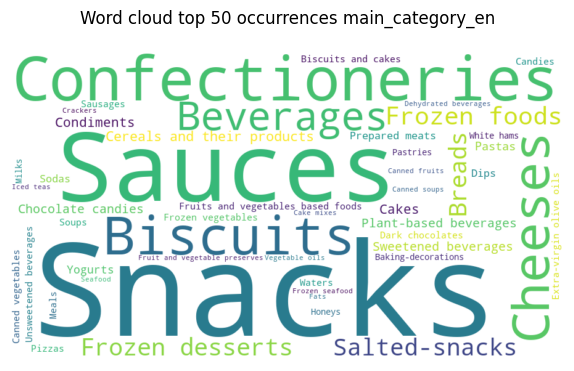

In [36]:
# Most represented categories
for category in categs:
    print('*'*25,category,'*'*25)
    top_categ, top_categ_list = tbx.top_words(df=data, column=category)
    print('Total of unique values in {} :'.format(category), len(top_categ))
    tbx.plot_world_cloud(df=data,column=category, figsize=(9,4), top=50)

In [37]:
data2 = data[~((data.product_name.isnull()) & ((data.pnns_groups_1 == "unknown") | (data.main_category_en == "unknown")))]

In [113]:
nutrients = tbx.search_componant(data2, suffix='_100g') 
for nutrient in ['nutrition-score-fr_100g','energy-kcal_100g','energy_100g']:
    nutrients.remove(nutrient)
nutrients

['fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'fiber_100g',
 'sodium_100g',
 'salt_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'carbohydrates_100g',
 'fat_100g',
 'proteins_100g',
 'fruits-vegetables-nuts_100g']

In [114]:
data3 = data2[~(data2[nutrients] < 0).any(axis=1)]
data3 = data3[~(data3[nutrients] > 100).any(axis=1)]

# acording to wikipedia : 3700 kj energy/100g => (https://en.wikipedia.org/wiki/Food_energy)
data3 = data3[~((data3['energy_100g'] > 3700) | (data3['energy-kcal_100g'] > 900))]
print('Total outliers deleted : ',len(data2)-len(data3))


Total outliers deleted :  7473


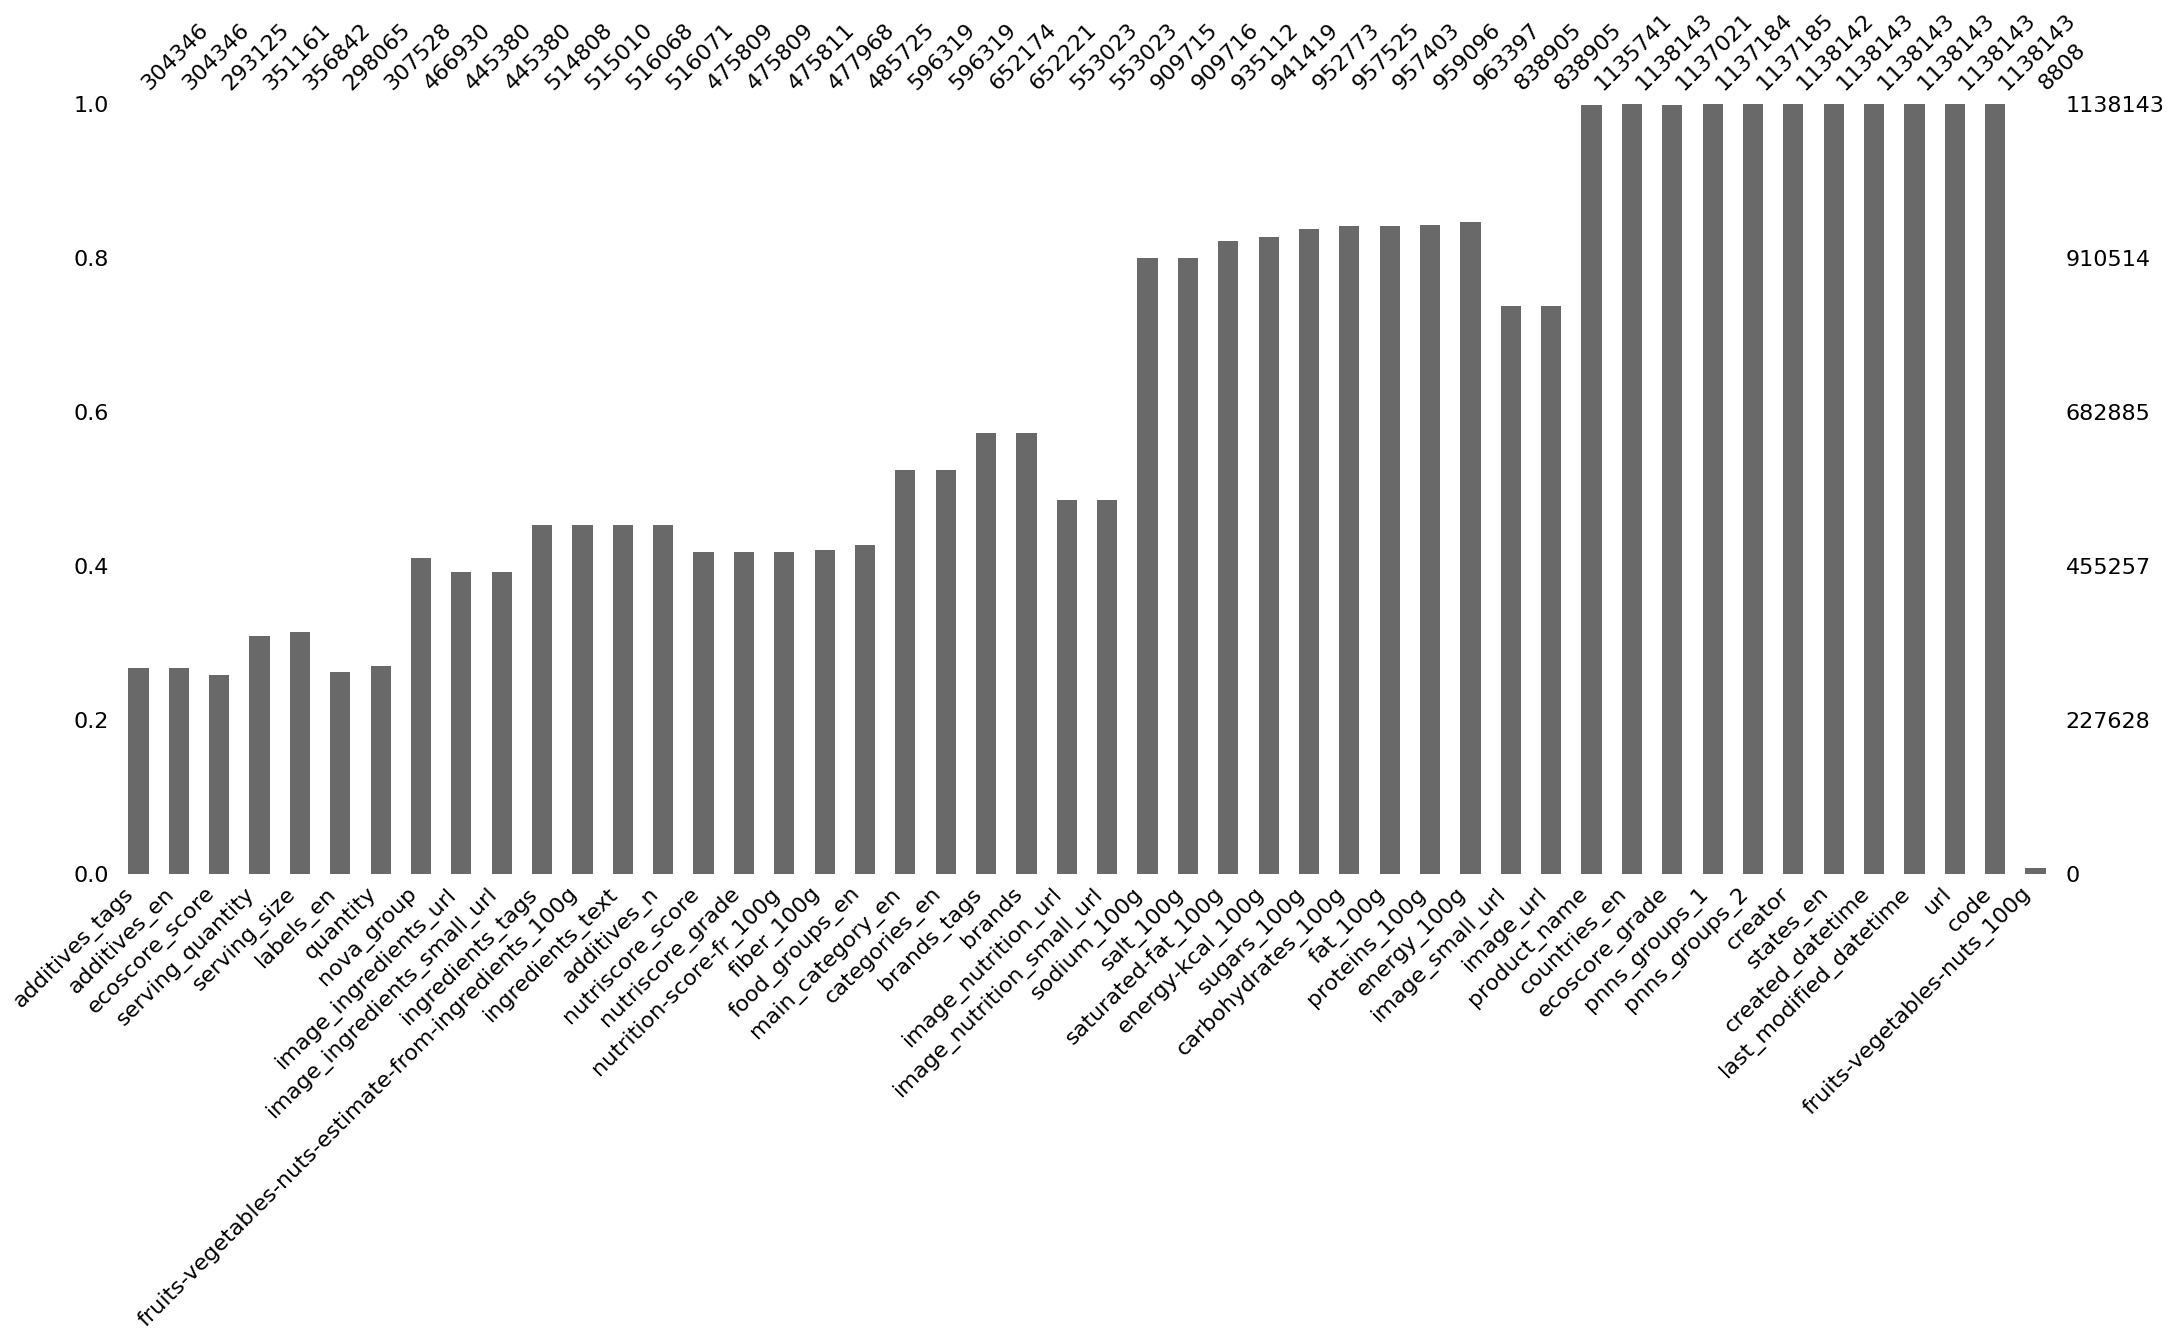

In [115]:
msno.bar(data3)
plt.show()

In [155]:
datas_cleaned = data3.copy()
numerical_features= list(datas_cleaned.select_dtypes(include=["float64","int64"]).columns)

In [156]:
numerical_features

['ecoscore_score',
 'serving_quantity',
 'nova_group',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'additives_n',
 'nutriscore_score',
 'nutrition-score-fr_100g',
 'fiber_100g',
 'sodium_100g',
 'salt_100g',
 'saturated-fat_100g',
 'energy-kcal_100g',
 'sugars_100g',
 'carbohydrates_100g',
 'fat_100g',
 'proteins_100g',
 'energy_100g',
 'fruits-vegetables-nuts_100g']

In [157]:
datas_cleaned.corr()

/var/folders/6q/l5f8yh2s7zb3h6v917nhx4gr0000gp/T/ipykernel_6277/3580225525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datas_cleaned.corr()


,ecoscore_score,serving_quantity,nova_group,fruits-vegetables-nuts-estimate-from-ingredients_100g,additives_n,nutriscore_score,nutrition-score-fr_100g,fiber_100g,sodium_100g,salt_100g,saturated-fat_100g,energy-kcal_100g,sugars_100g,carbohydrates_100g,fat_100g,proteins_100g,energy_100g,fruits-vegetables-nuts_100g
ecoscore_score,1.000000,0.017722,-0.187905,0.113142,-0.169795,-0.364222,-0.364226,0.056314,0.011883,0.011763,-0.317142,-0.278653,-0.021922,0.107847,-0.331738,-0.339253,-0.278968,0.191765
serving_quantity,0.017722,1.000000,0.001007,-0.000614,0.000297,0.001311,0.001311,-0.001961,0.000185,0.000185,-0.000147,-0.000712,-0.001247,-0.001599,0.000207,0.000709,-0.000691,0.123277
nova_group,-0.187905,0.001007,1.000000,-0.361023,0.410497,0.399475,0.399477,-0.153810,0.028614,0.028602,0.072637,0.068282,0.182462,0.123285,-0.010287,-0.012229,0.067993,-0.370346
fruits-vegetables-nuts-estimate-from-ingredients_100g,0.113142,-0.000614,-0.361023,1.000000,-0.159789,-0.250857,-0.250839,0.064217,-0.058954,-0.058964,-0.102779,-0.062814,-0.020166,-0.137298,0.047069,-0.114718,-0.070386,0.666359
additives_n,-0.169795,0.000297,0.410497,-0.159789,1.000000,0.256470,0.256465,-0.131601,-0.024272,-0.024249,0.006009,0.059438,0.177675,0.178624,-0.039881,-0.099952,0.059068,-0.223024
nutriscore_score,-0.364222,0.001311,0.399475,-0.250857,0.256470,1.000000,1.000000,-0.159648,0.128204,0.128335,0.592263,0.578392,0.441945,0.256888,0.504088,0.058429,0.581630,-0.374280
nutrition-score-fr_100g,-0.364226,0.001311,0.399477,-0.250839,0.256465,1.000000,1.000000,-0.159650,0.128203,0.128334,0.592265,0.578392,0.441944,0.256885,0.504094,0.058433,0.581634,-0.374280
fiber_100g,0.056314,-0.001961,-0.153810,0.064217,-0.131601,-0.159648,-0.159650,1.000000,-0.013828,-0.013889,0.017984,0.242997,-0.011550,0.217091,0.120313,0.197351,0.243204,0.164724
sodium_100g,0.011883,0.000185,0.028614,-0.058954,-0.024272,0.128204,0.128203,-0.013828,1.000000,0.999648,-0.015236,-0.056594,-0.092891,-0.076653,-0.020428,0.031216,-0.055564,-0.080888
salt_100g,0.011763,0.000185,0.028602,-0.058964,-0.024249,0.128335,0.128334,-0.013889,0.999648,1.000000,-0.015229,-0.056602,-0.092931,-0.076663,-0.020416,0.031237,-0.055564,-0.080966


In [158]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from time import time

In [159]:
iterimp =  IterativeImputer() 

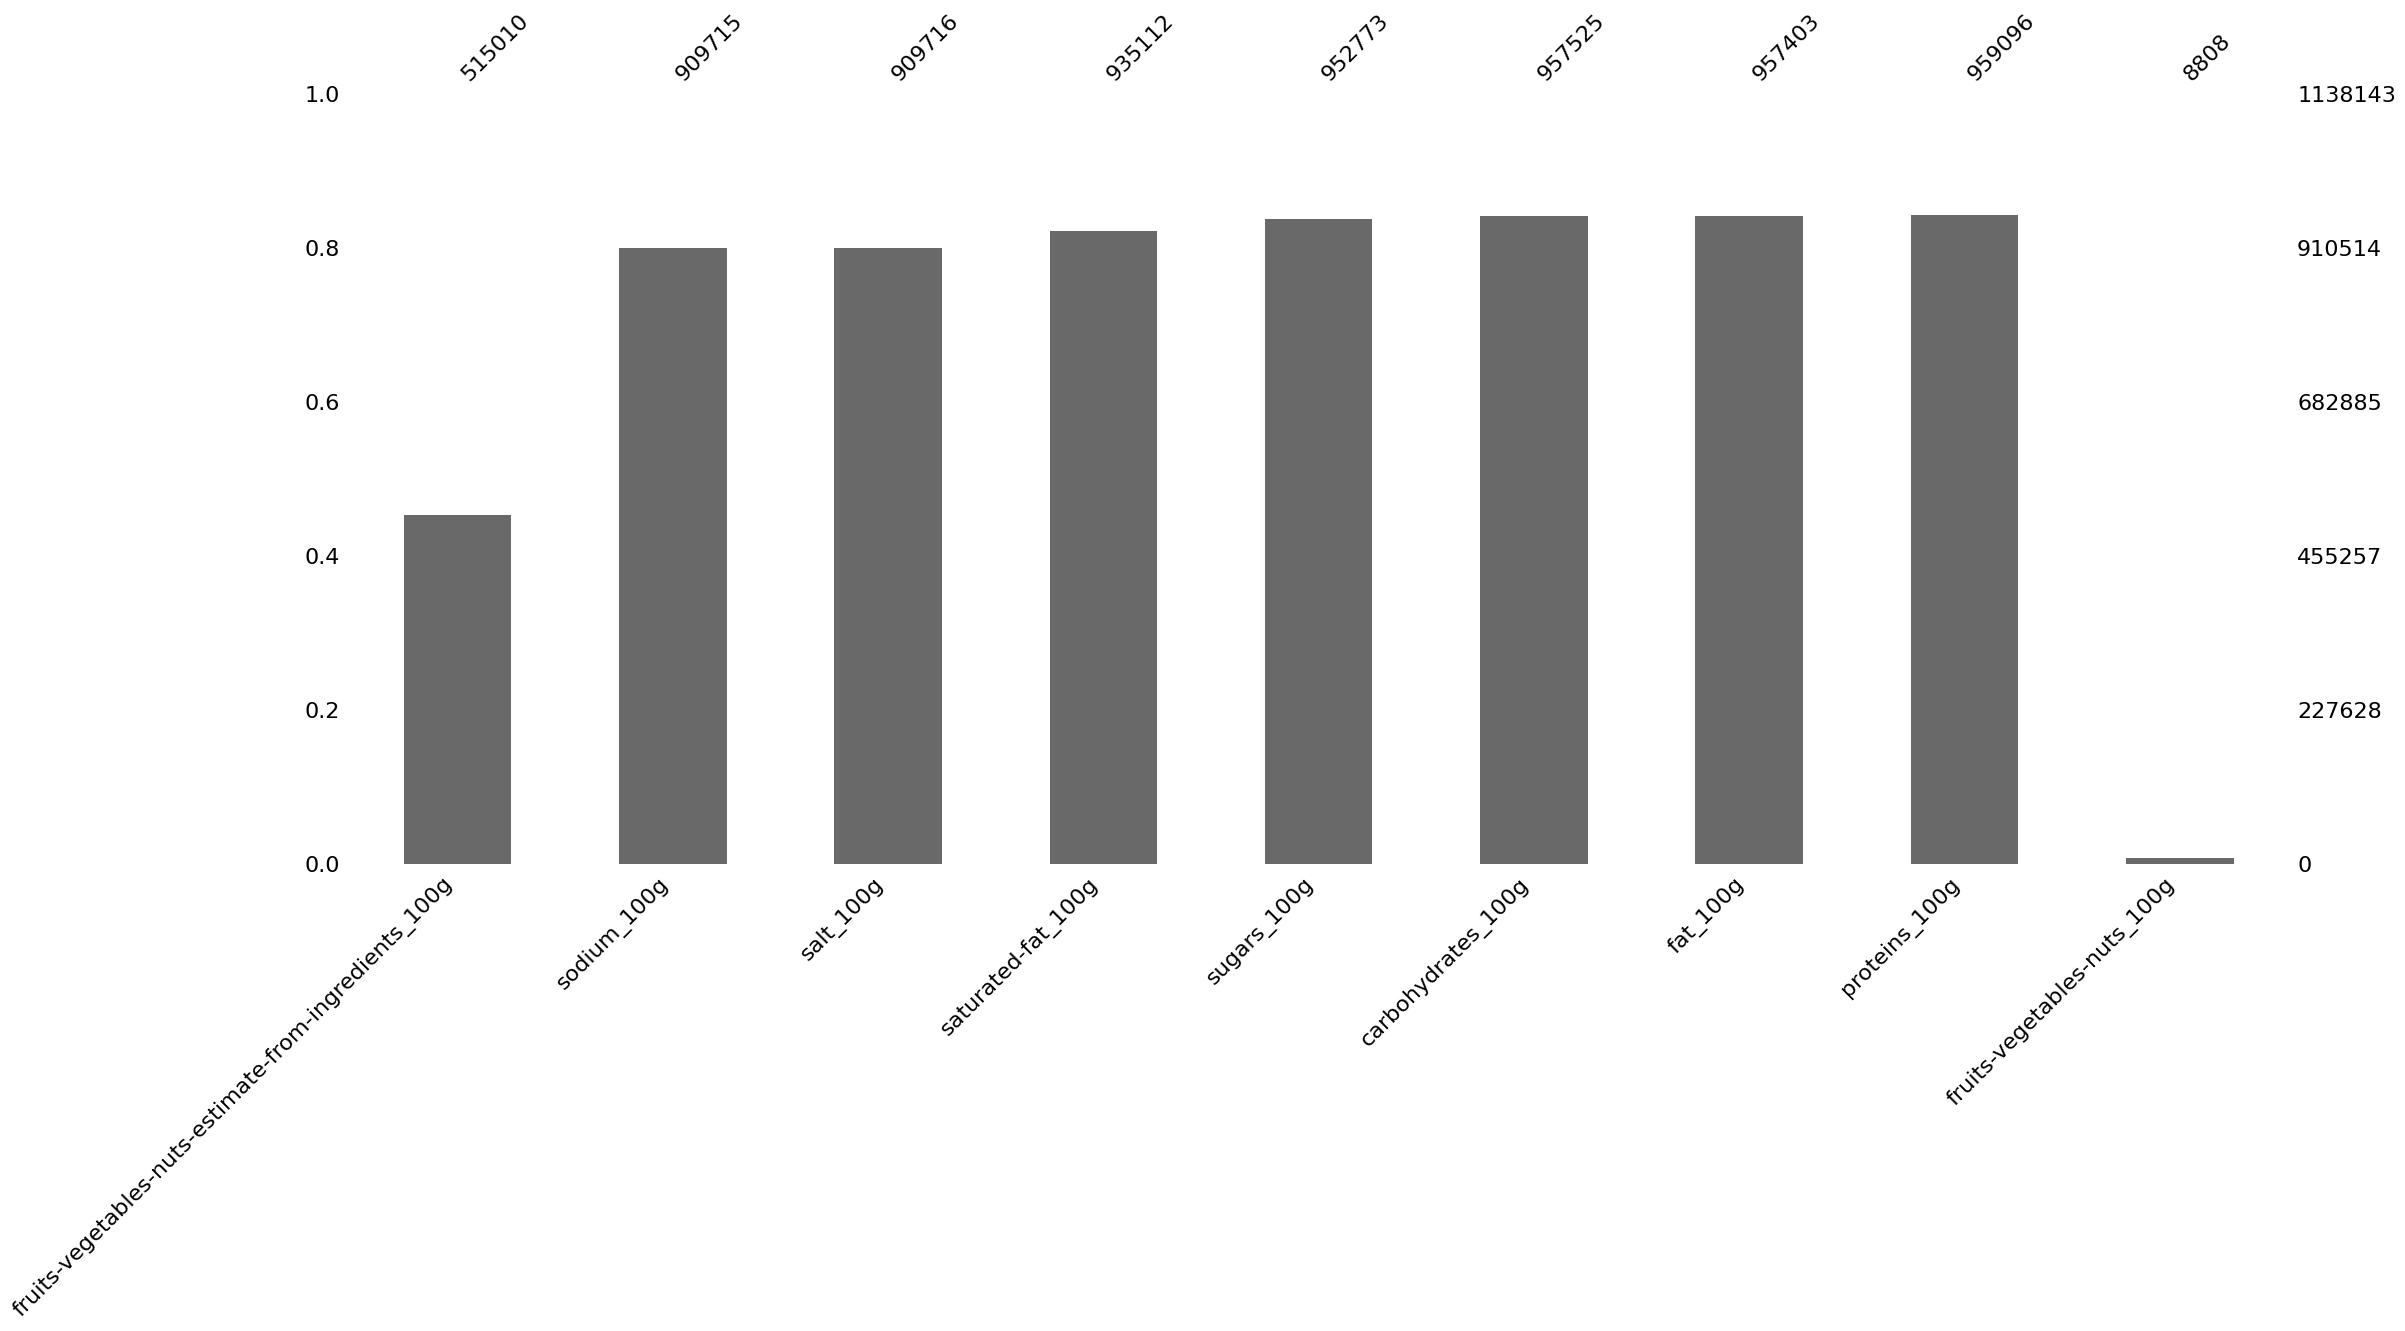

In [160]:
msno.bar(datas_cleaned[nutrients])
plt.show()

In [161]:
# step 1 imputtions : energy vs fat
print('*'*10, 'energy & fat','*'*10)
it_imp_1 =['energy-kcal_100g', 'energy_100g', 'fat_100g','saturated-fat_100g']
print('Before imputation',)
print(datas_cleaned[it_imp_1].isna().sum(), '\n')
print('After imputation')
datas_cleaned.loc[:,it_imp_1] = iterimp.fit_transform(datas_cleaned[it_imp_1])
print(datas_cleaned[it_imp_1].isna().sum(),'\n')

# step 2 imputtion : 'sodium_100g' vs 'salt_100g'
print('*'*10, 'salt & sodium','*'*10)
it_imp_2 = ['sodium_100g','salt_100g']
print('Before imputation',)
print(datas_cleaned[it_imp_2].isna().sum(), '\n')
print('After imputation')
datas_cleaned.loc[:,it_imp_2] = iterimp.fit_transform(datas_cleaned[it_imp_2])
print(datas_cleaned[it_imp_2].isna().sum(),'\n')

# step 3 imputtion : fruit vegetables
#print('*'*10, 'fruits vegetables','*'*10)
#it_imp_3 = ['fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']
#print('Before imputation',)
#print(datas_cleaned[it_imp_3].isna().sum(),'\n')
#print('After imputation')
#datas_cleaned.loc[:,it_imp_3] = iterimp.fit_transform(datas_cleaned[it_imp_3])
#print(datas_cleaned[it_imp_3].isna().sum(),'\n')


print('*'*10, 'sugars_100g & carbohydrates','*'*10)
it_imp_4 = ['sugars_100g','carbohydrates_100g']
print('Before imputation',)
print(datas_cleaned[it_imp_4].isna().sum(), '\n')
print('After imputation')
datas_cleaned.loc[:,it_imp_4] = iterimp.fit_transform(datas_cleaned[it_imp_4])
print(datas_cleaned[it_imp_4].isna().sum())



********** energy & fat **********
Before imputation
energy-kcal_100g      196724
energy_100g           174746
fat_100g              180740
saturated-fat_100g    203031
dtype: int64 

After imputation


/Users/alhassanneahmedap59_cb/OC/project_3/.venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


energy-kcal_100g      0
energy_100g           0
fat_100g              0
saturated-fat_100g    0
dtype: int64 

********** salt & sodium **********
Before imputation
sodium_100g    228428
salt_100g      228427
dtype: int64 

After imputation
sodium_100g    0
salt_100g      0
dtype: int64 

********** sugars_100g & carbohydrates **********
Before imputation
sugars_100g           185370
carbohydrates_100g    180618
dtype: int64 

After imputation
sugars_100g           0
carbohydrates_100g    0
dtype: int64


In [162]:
#  iterative imputer
#it_imp_1 =['energy-kcal_100g', 'energy_100g', 'fat_100g','saturated-fat_100g','sugars_100g','carbohydrates_100g','sodium_100g','salt_100g','fruits-vegetables-nuts_100g','fruits-vegetables-nuts-estimate-from-ingredients_100g','nutriscore_score']
#print('Before imputation',)
#print(datas_cleaned[it_imp_1].isna().sum(), '\n')
#print('After imputation')
#datas_cleaned.loc[:,it_imp_1] = iterimp.fit_transform(datas_cleaned[it_imp_1])
#print(datas_cleaned[it_imp_1].isna().sum(),'\n')

In [163]:
# fiber => penns_group median
datas_cleaned['fiber_100g'] = datas_cleaned.groupby('pnns_groups_2')['fiber_100g'].transform(lambda x: x.fillna(x.median()))

# fruits fillna(0)
datas_cleaned['fruits-vegetables-nuts_100g'] = datas_cleaned['fruits-vegetables-nuts_100g'].fillna(0)

datas_cleaned['proteins_100g'] = datas_cleaned.groupby('pnns_groups_2')['proteins_100g'].transform(lambda x: x.fillna(x.median()))

/Users/alhassanneahmedap59_cb/OC/project_3/.venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/alhassanneahmedap59_cb/OC/project_3/.venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [164]:
datas_cleaned.describe().round(2)

,ecoscore_score,serving_quantity,nova_group,fruits-vegetables-nuts-estimate-from-ingredients_100g,additives_n,nutriscore_score,nutrition-score-fr_100g,fiber_100g,sodium_100g,salt_100g,saturated-fat_100g,energy-kcal_100g,sugars_100g,carbohydrates_100g,fat_100g,proteins_100g,energy_100g,fruits-vegetables-nuts_100g
count,293125.00,3.511610e+05,466930.00,515010.00,516071.00,475809.00,475811.00,1137183.00,1138143.00,1138143.00,1138143.00,1138143.00,1138143.00,1138143.00,1138143.00,1137183.00,1138143.00,1138143.00
mean,45.19,1.130845e+07,3.42,8.20,2.09,9.26,9.26,2.18,0.56,1.39,4.71,266.15,14.40,30.07,12.70,7.72,1113.26,0.25
std,25.89,6.355470e+09,0.96,21.43,2.96,8.88,8.88,3.66,1.79,4.48,6.71,169.87,18.72,26.07,14.83,9.17,710.38,4.32
min,-30.00,0.000000e+00,1.00,0.00,0.00,-15.00,-15.00,0.00,0.00,0.00,-1.21,0.00,-0.42,0.00,-4.55,0.00,0.00,0.00
25%,28.00,2.800000e+01,3.00,0.00,0.00,2.00,2.00,0.42,0.05,0.12,0.10,124.00,1.10,6.47,1.00,1.30,519.00,0.00
50%,42.00,4.800000e+01,4.00,0.00,1.00,10.00,10.00,1.80,0.37,0.93,2.68,266.15,7.30,30.00,10.00,5.60,1113.26,0.00
75%,67.00,1.130000e+02,4.00,1.00,3.00,16.00,16.00,1.80,0.56,1.39,5.30,376.00,15.62,50.00,17.19,10.00,1573.00,0.00
max,125.00,3.760276e+12,4.00,100.00,39.00,40.00,40.00,100.00,49.99,100.00,100.00,900.00,100.00,111.88,122.27,100.00,3700.00,100.00


In [165]:
datas_cleaned = datas_cleaned[~(datas_cleaned[nutrients] < 0).any(axis=1)]

In [166]:
datas_cleaned2 = datas_cleaned[~datas_cleaned.additives_tags.isnull()]

In [167]:
datas_cleaned2.describe().round(2)

,ecoscore_score,serving_quantity,nova_group,fruits-vegetables-nuts-estimate-from-ingredients_100g,additives_n,nutriscore_score,nutrition-score-fr_100g,fiber_100g,sodium_100g,salt_100g,saturated-fat_100g,energy-kcal_100g,sugars_100g,carbohydrates_100g,fat_100g,proteins_100g,energy_100g,fruits-vegetables-nuts_100g
count,99462.00,2.079380e+05,295618.00,301561.00,301575.00,226169.00,226171.00,301574.00,301575.00,301575.00,301575.00,301575.00,301575.00,301575.00,301575.00,301574.00,301575.00,301575.00
mean,44.17,1.808373e+07,3.89,5.16,3.55,11.27,11.27,1.99,0.53,1.34,4.85,274.17,18.35,34.74,12.09,6.80,1146.71,0.41
std,24.11,8.246179e+09,0.41,14.53,3.12,8.48,8.48,3.20,1.57,3.94,6.27,164.67,21.15,27.92,12.89,8.04,688.46,5.06
min,-30.00,0.000000e+00,1.00,0.00,1.00,-14.00,-14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28.00,2.800000e+01,4.00,0.00,1.00,4.00,4.00,0.00,0.06,0.14,0.18,128.00,2.00,8.75,0.89,1.20,535.00,0.00
50%,39.00,4.300000e+01,4.00,0.00,3.00,12.00,12.00,1.40,0.30,0.76,2.30,266.15,9.86,30.07,8.57,5.10,1113.26,0.00
75%,63.00,1.100000e+02,4.00,0.00,5.00,18.00,18.00,2.40,0.56,1.39,7.10,400.00,29.27,58.82,19.74,8.80,1674.00,0.00
max,124.00,3.760276e+12,4.00,100.00,39.00,40.00,40.00,100.00,40.00,100.00,100.00,900.00,100.00,111.88,100.00,100.00,3700.00,100.00


In [168]:
relevantdata =['sodium_100g','energy_100g','additives_tags', 'additives_en','nova_group','additives_n', 'nutriscore_score', 'nutriscore_grade', 
               'fiber_100g','main_category_en', 'categories_en','brands', 'salt_100g','saturated-fat_100g', 'energy-kcal_100g', 
               'sugars_100g', 'fat_100g','proteins_100g','product_name', 'countries_en', 
               'ecoscore_grade', 'pnns_groups_1','pnns_groups_2', 'creator', 'states_en','code', 'fruits-vegetables-nuts_100g']

df_final = datas_cleaned2[relevantdata]

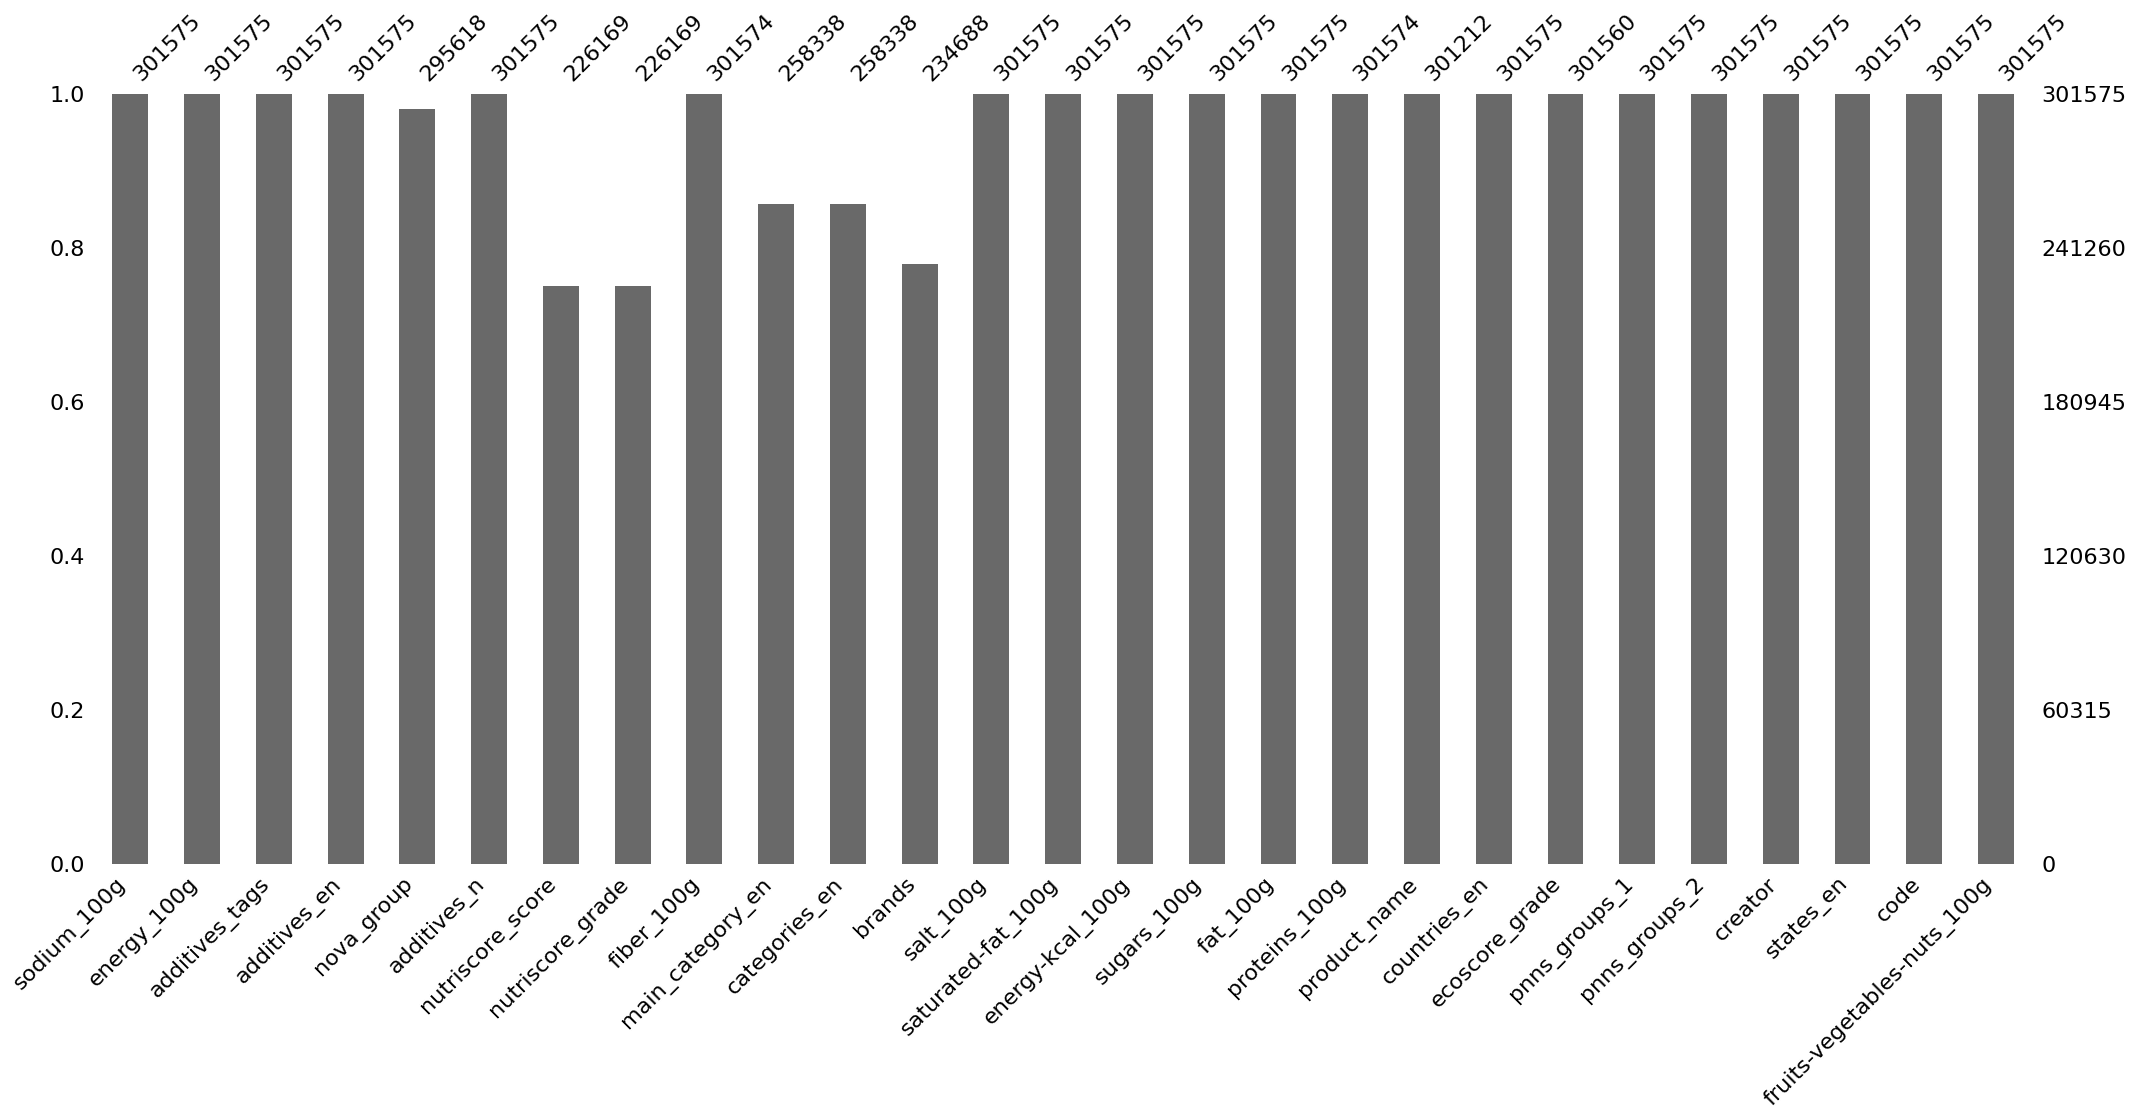

In [169]:
msno.bar(df_final)
plt.show()

In [170]:
nutrients_df_final = tbx.search_componant(df_final, suffix='_100g')
nutrients_df_final

['sodium_100g',
 'energy_100g',
 'fiber_100g',
 'salt_100g',
 'saturated-fat_100g',
 'energy-kcal_100g',
 'sugars_100g',
 'fat_100g',
 'proteins_100g',
 'fruits-vegetables-nuts_100g']

In [171]:
for elem in ['energy-kcal_100g','energy_100g']:
    nutrients_df_final.remove(elem)

df_final = df_final[~(df_final[nutrients_df_final] < 0).any(axis=1)]
df_final = df_final[~(df_final[nutrients_df_final] > 100).any(axis=1)]

In [172]:
df_final.describe()

,sodium_100g,energy_100g,nova_group,additives_n,nutriscore_score,fiber_100g,salt_100g,saturated-fat_100g,energy-kcal_100g,sugars_100g,fat_100g,proteins_100g,fruits-vegetables-nuts_100g
count,301575.000000,301575.000000,295618.000000,301575.000000,226169.000000,301574.000000,301575.000000,301575.000000,301575.000000,301575.000000,301575.000000,301574.000000,301575.000000
mean,0.534907,1146.709036,3.886570,3.553919,11.267534,1.987777,1.337281,4.850006,274.174520,18.351923,12.088294,6.795669,0.409997
std,1.574597,688.456745,0.411216,3.116976,8.478128,3.204547,3.936485,6.273727,164.666779,21.146381,12.886438,8.041336,5.056454
min,0.000000,0.000000,1.000000,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.056000,535.000000,4.000000,1.000000,4.000000,0.000000,0.140000,0.180000,128.000000,2.000000,0.890000,1.200000,0.000000
50%,0.302768,1113.260725,4.000000,3.000000,12.000000,1.400000,0.757500,2.300000,266.148150,9.860000,8.570000,5.100000,0.000000
75%,0.556804,1674.000000,4.000000,5.000000,18.000000,2.400000,1.391852,7.100000,400.000000,29.270000,19.740000,8.800000,0.000000
max,40.000000,3700.000000,4.000000,39.000000,40.000000,100.000000,100.000000,100.000000,900.000000,100.000000,100.000000,100.000000,100.000000


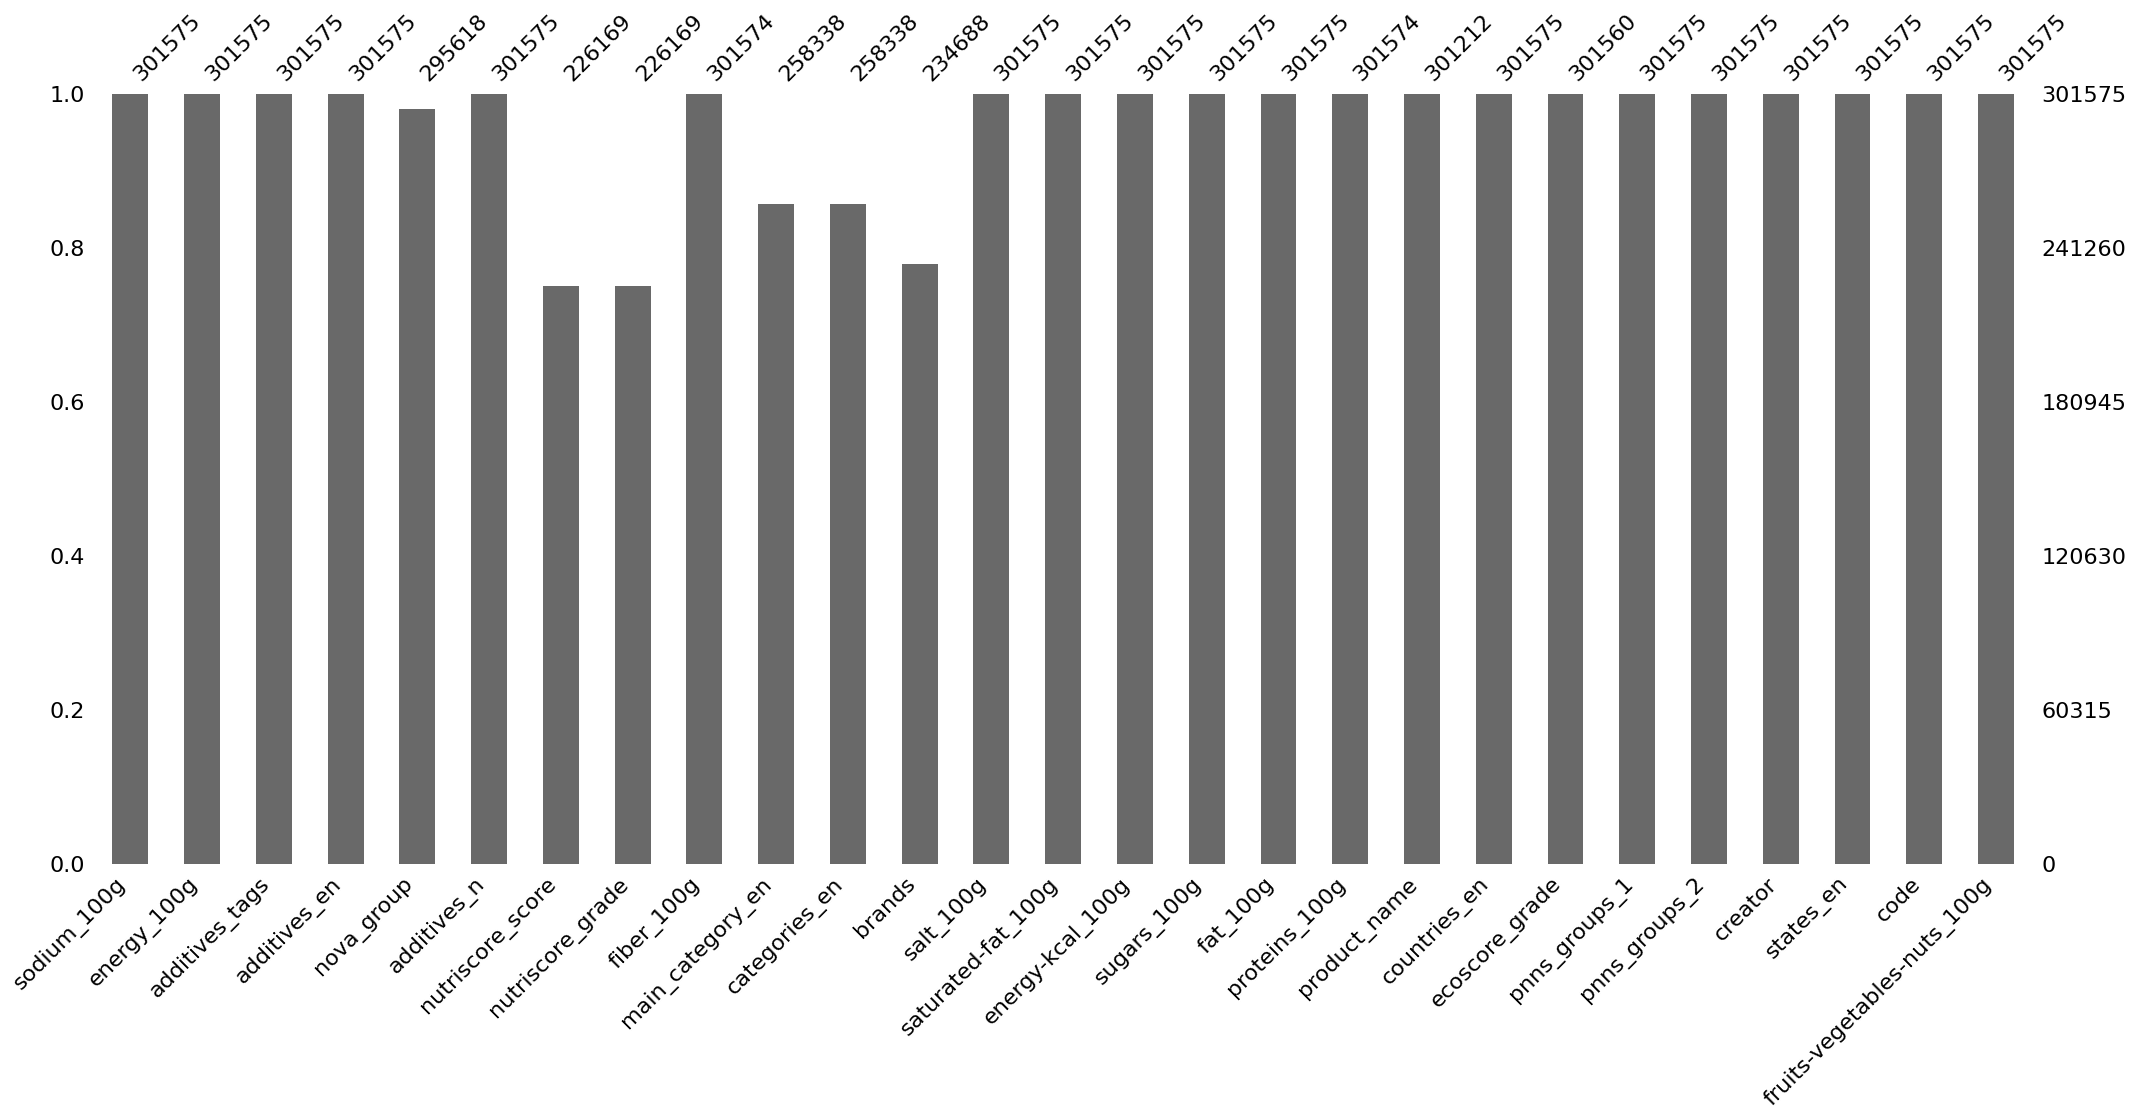

In [173]:
msno.bar(df_final)
plt.show()

In [174]:
nutriscore_features = ['energy_100g','sugars_100g','saturated-fat_100g','sodium_100g', 'fiber_100g', 'proteins_100g']

In [175]:
#beverages = df_final[(df_final['pnns_groups_1']=='Beverages')|(df_final['pnns_groups_1']=='Alcoholic beverages')]
#msno.bar(beverages)
#plt.show()

In [176]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [177]:
encoder = LabelEncoder()
df_final['nutriscore_grade2'] = encoder.fit_transform(df_final['nutriscore_grade'])


In [178]:
df_final.corr()

/var/folders/6q/l5f8yh2s7zb3h6v917nhx4gr0000gp/T/ipykernel_6277/2875322423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()


,sodium_100g,energy_100g,nova_group,additives_n,nutriscore_score,fiber_100g,salt_100g,saturated-fat_100g,energy-kcal_100g,sugars_100g,fat_100g,proteins_100g,fruits-vegetables-nuts_100g,nutriscore_grade2
sodium_100g,1.000000,-0.033571,-0.027563,-0.036714,0.080870,-0.004153,0.999998,-0.038921,-0.033574,-0.127230,-0.008937,0.071331,-0.015315,0.069915
energy_100g,-0.033571,1.000000,0.142687,0.063338,0.710177,0.263984,-0.033571,0.606981,0.996813,0.436865,0.727342,0.222809,-0.064833,0.312786
nova_group,-0.027563,0.142687,1.000000,0.202427,0.198642,-0.017092,-0.027561,0.080252,0.142467,0.124761,0.068773,0.029366,-0.072583,0.186132
additives_n,-0.036714,0.063338,0.202427,1.000000,0.134076,-0.070289,-0.036713,-0.030354,0.063207,0.095591,-0.033324,-0.072986,-0.036486,0.074245
nutriscore_score,0.080870,0.710177,0.198642,0.134076,1.000000,-0.069713,0.080867,0.661510,0.709673,0.490194,0.613179,0.069625,-0.076527,0.937608
fiber_100g,-0.004153,0.263984,-0.017092,-0.070289,-0.069713,1.000000,-0.004154,0.067485,0.264612,0.013089,0.132063,0.147228,-0.003542,-0.080885
salt_100g,0.999998,-0.033571,-0.027561,-0.036713,0.080867,-0.004154,1.000000,-0.038923,-0.033573,-0.127231,-0.008933,0.071328,-0.015315,0.069910
saturated-fat_100g,-0.038921,0.606981,0.080252,-0.030354,0.661510,0.067485,-0.038923,1.000000,0.608006,0.144279,0.774499,0.193047,-0.046792,0.280946
energy-kcal_100g,-0.033574,0.996813,0.142467,0.063207,0.709673,0.264612,-0.033573,0.608006,1.000000,0.436424,0.728701,0.223388,-0.064951,0.311937
sugars_100g,-0.127230,0.436865,0.124761,0.095591,0.490194,0.013089,-0.127231,0.144279,0.436424,1.000000,0.004300,-0.264098,-0.009004,0.292707


In [179]:
print('*'*10, 'nutriscore_grade & nutriscore_score','*'*10)
it_imp_5 = ['nutriscore_grade2','nutriscore_score','energy_100g', 'saturated-fat_100g',]
print('Before imputation',)
print(df_final[it_imp_5].isna().sum(), '\n')
print('After imputation')
df_final.loc[:,it_imp_5] = iterimp.fit_transform(df_final[it_imp_5])
print(df_final[it_imp_5].isna().sum())

********** nutriscore_grade & nutriscore_score **********
Before imputation
nutriscore_grade2         0
nutriscore_score      75406
energy_100g               0
saturated-fat_100g        0
dtype: int64 

After imputation
nutriscore_grade2     0
nutriscore_score      0
energy_100g           0
saturated-fat_100g    0
dtype: int64


/var/folders/6q/l5f8yh2s7zb3h6v917nhx4gr0000gp/T/ipykernel_6277/2962199930.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_final.loc[:,it_imp_5] = iterimp.fit_transform(df_final[it_imp_5])


In [180]:
df_final.nutriscore_score.max()

41.781114989706396

In [181]:
df_final['nutrigrade'] = pd.cut(df_final['nutriscore_score'], bins=[-15,-1,3,11,16,40], labels=['a','b','c','d','e'], include_lowest=True)

In [182]:
# https://fr.wikipedia.org/wiki/Nutri-score
df_final['nutriscore_grade'] = df_final['nutriscore_grade'].fillna(pd.cut(df_final['nutriscore_score'], bins=[-15,-1,3,11,16,40], labels=['a','b','c','d','e'], include_lowest=True))

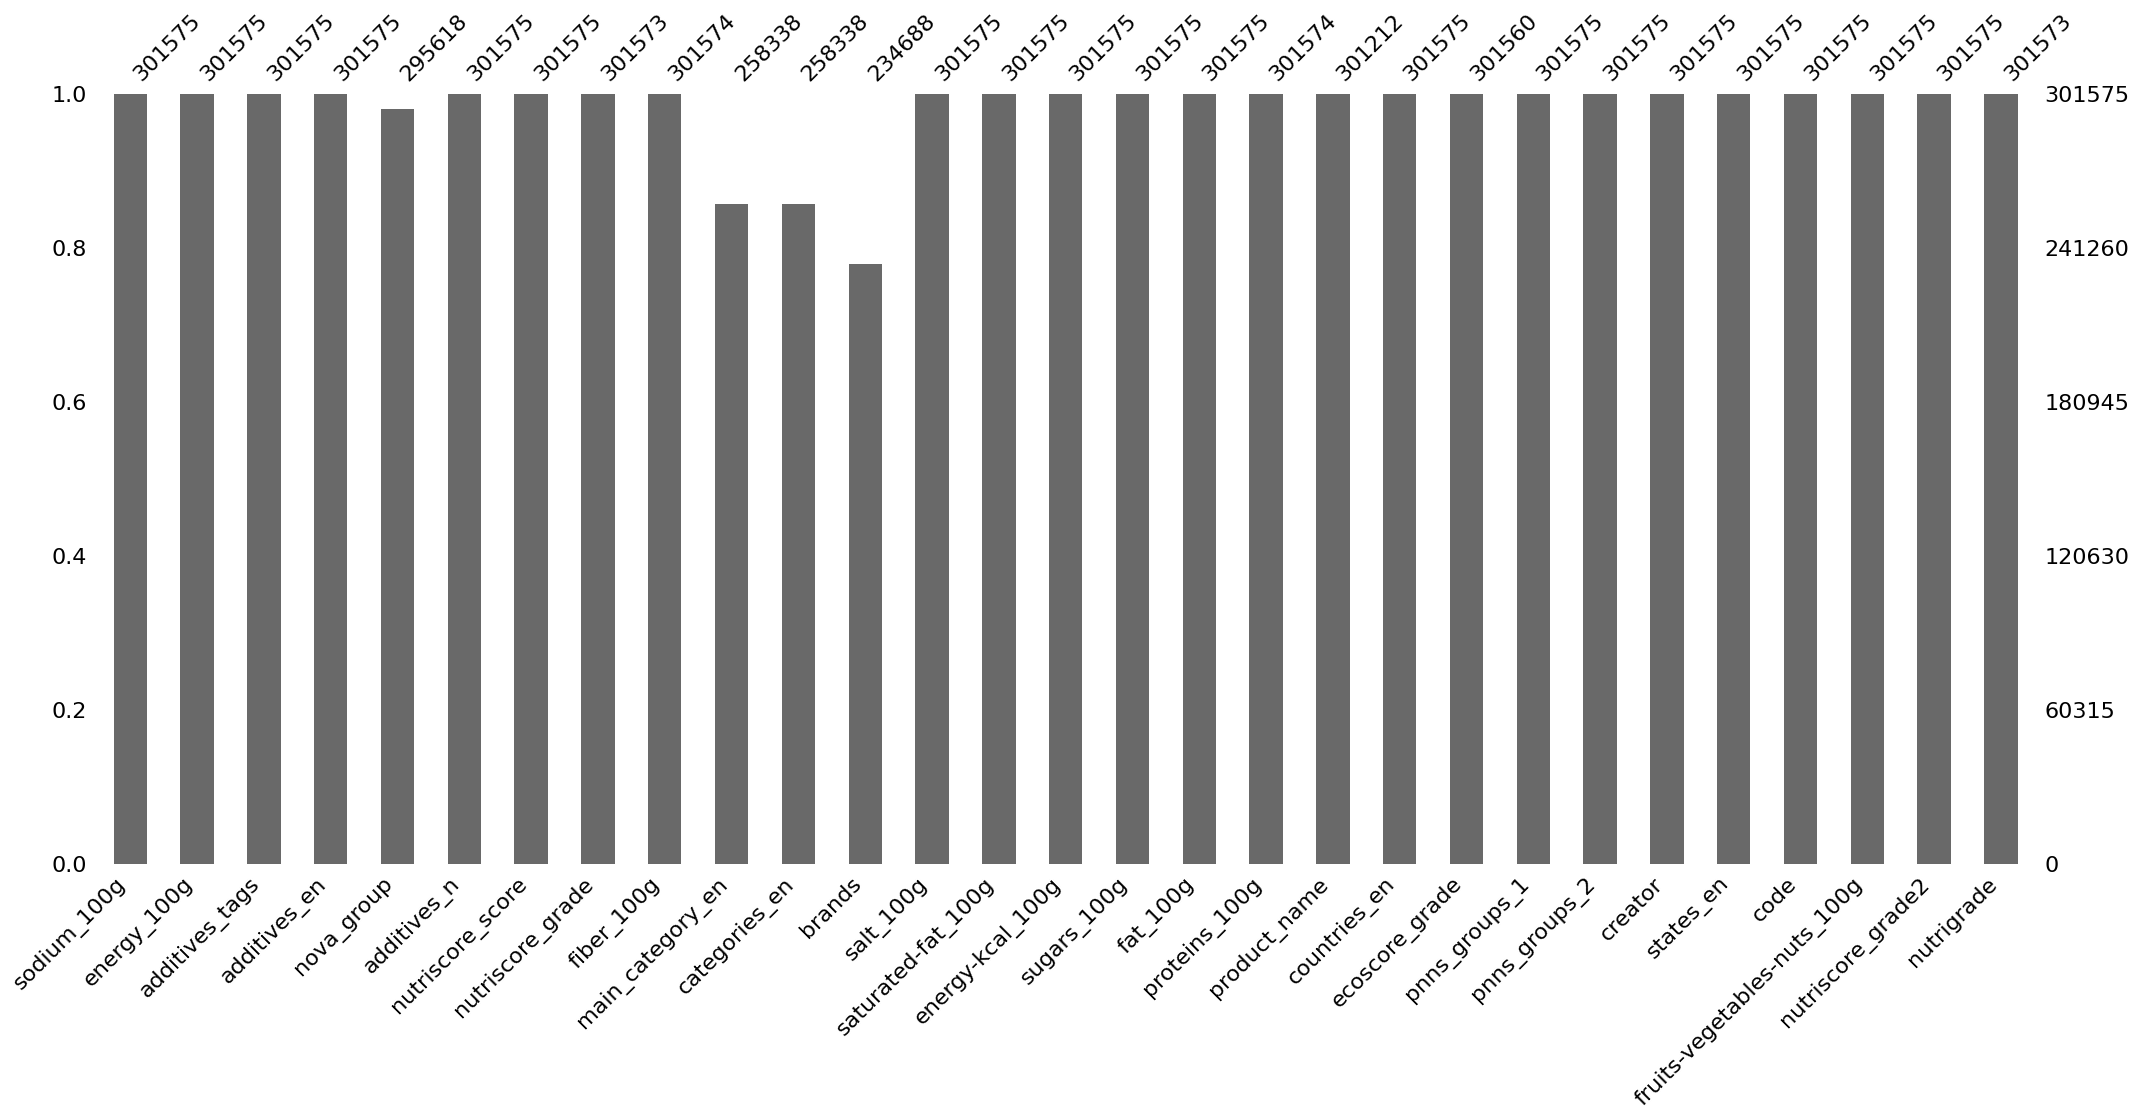

In [183]:
msno.bar(df_final)
plt.show()

In [184]:
relevantdata =['sodium_100g','energy_100g','additives_tags', 'additives_en','nova_group','additives_n', 'nutriscore_score', 'nutriscore_grade', 
               'fiber_100g','main_category_en', 'categories_en','brands', 'salt_100g','saturated-fat_100g', 'energy-kcal_100g', 
               'sugars_100g', 'fat_100g','proteins_100g','product_name', 'countries_en', 
               'ecoscore_grade', 'pnns_groups_1','pnns_groups_2', 'creator', 'states_en','code', 'fruits-vegetables-nuts_100g']


In [185]:
df_final = df_final[relevantdata]

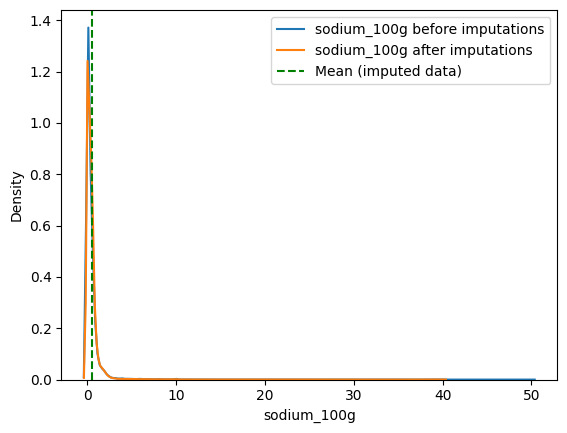

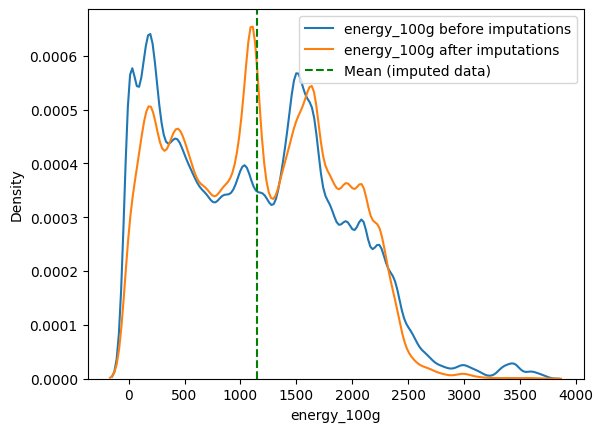

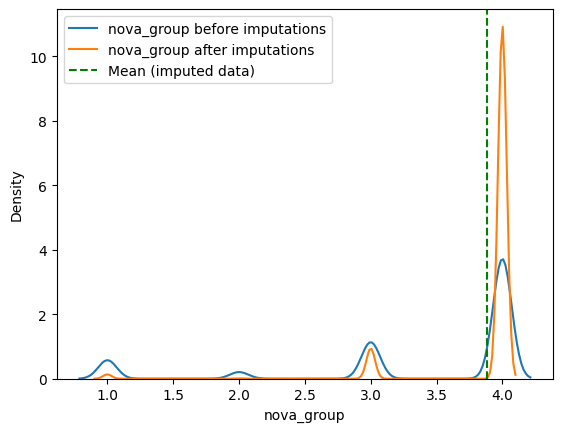

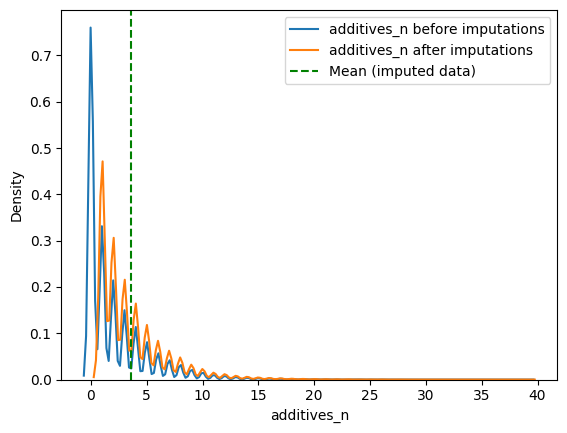

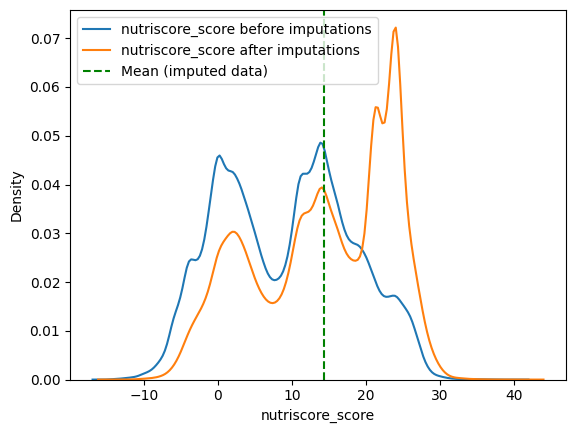

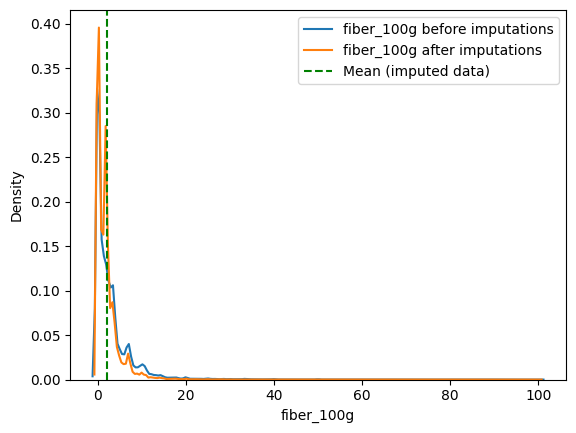

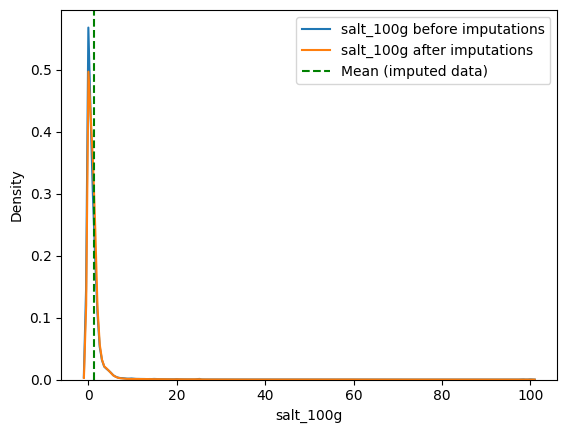

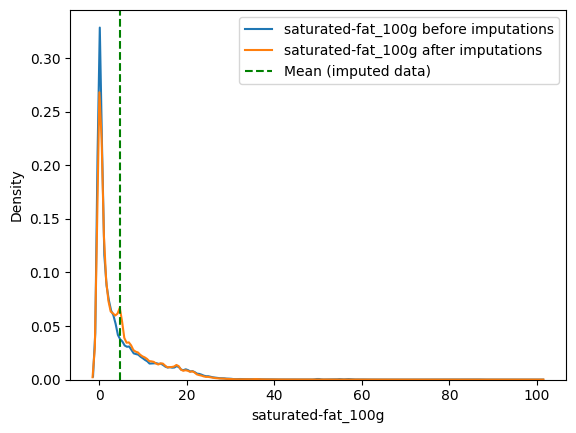

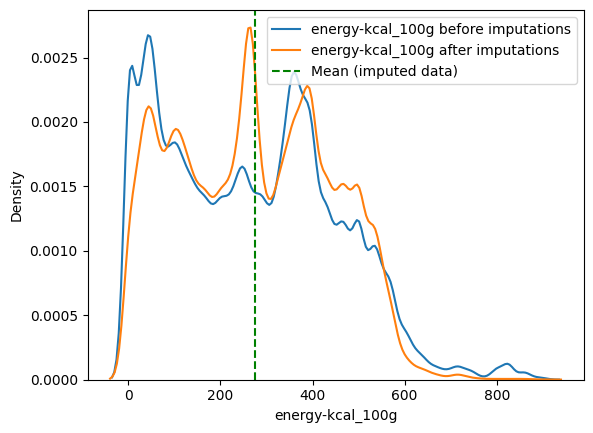

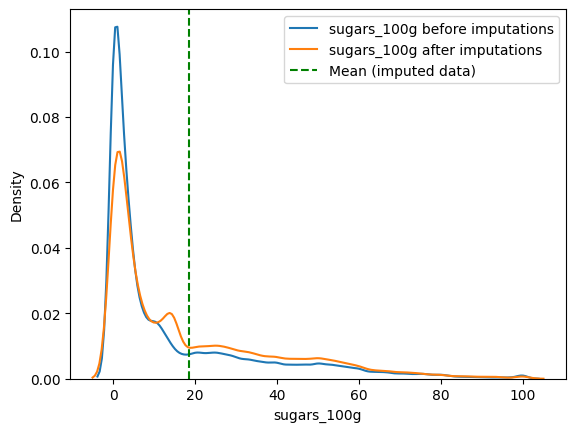

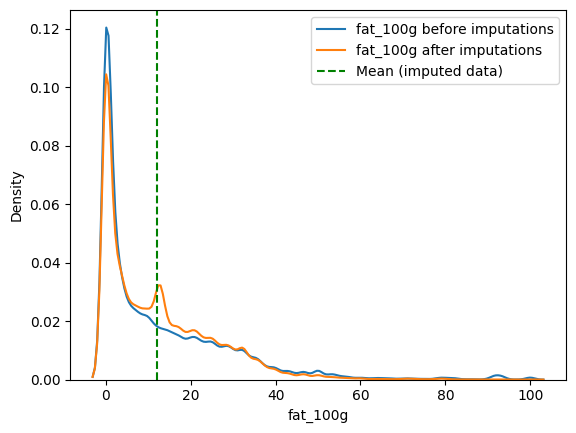

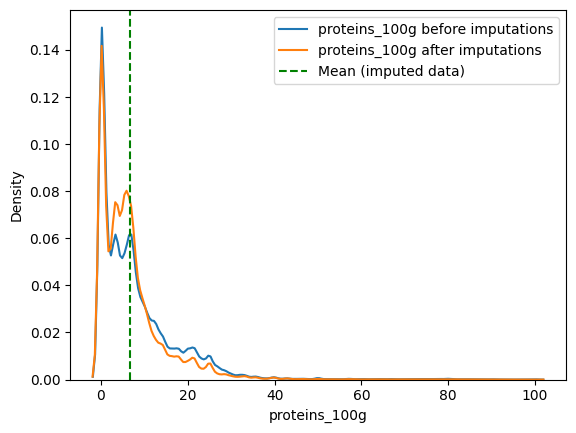

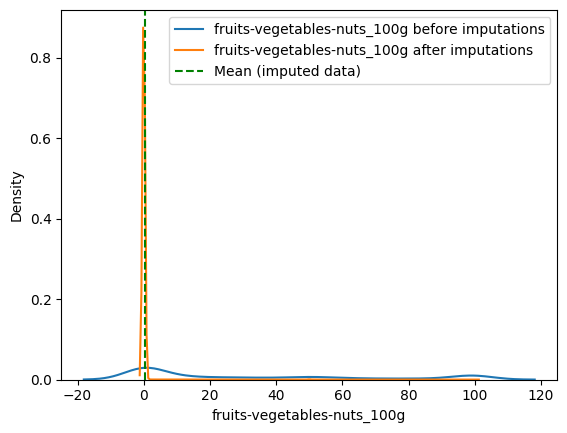

In [186]:
# Before & After imputing nan 
for elem in list(df_final.select_dtypes(include=["float64","int64"]).columns):
    mean = df_final[elem].mean()
    plt.figure()
    sns.kdeplot(data3[elem], label='{} before imputations'.format(elem), legend=True)
    sns.kdeplot(df_final[elem], label='{} after imputations'.format(elem), legend=True)
    plt.axvline(mean, color='g', linestyle='--', label='Mean (imputed data)')
    plt.legend()
    plt.show()
#plt.savefig('fiber_imput.png', dpi=150, bbox_inches='tight')


In [187]:
df_final.to_csv("df_final.csv", encoding='utf-8', index=False)